In [1]:
!pip install lazypredict
!pip install dtreeviz
!pip install yellowbrick
!pip install hyperopt
!pip install mlxtend
!pip install shap


[notice] A new release of pip is available: 23.0 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

from sklearn.model_selection import train_test_split
import dtreeviz
import xgboost as xgb
from xgboost import XGBClassifier
import yellowbrick.model_selection as ms
from yellowbrick import classifier
from sklearn import metrics

import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.metrics import accuracy_score, roc_auc_score
from typing import Any, Dict, Union
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.kernel_ridge import KernelRidge
import shap

In [3]:
os.chdir('C:/Users/xikix/Documents/Kaggle/Space titanic')

In [4]:
samples = pd.read_csv('sample_submission.csv')
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [5]:
print("TRAIN DATOS: ", df_train.shape)
print("DATOS TEST: ", df_test.shape)
print("LABELS TEST: ", samples.shape)

TRAIN DATOS:  (8693, 14)
DATOS TEST:  (4277, 13)
LABELS TEST:  (4277, 2)


In [6]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


*    PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
    
*    HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
    
*    CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
    
*    Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
    
*    Destination - The planet the passenger will be debarking to.
    
*    Age - The age of the passenger.
    
*    VIP - Whether the passenger has paid for special VIP service during the voyage.
    
*    RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
    
*    Name - The first and last names of the passenger.
    
*    Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

# **¿Cómo son los datos?**

In [7]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Primeras observaciones:

* PassengerId: al final, después del guión bajo, hay dos números que podrían significar grupos: 01, 02, 03...
* Cabin: está dividida en 3, con lo cual voy a dividir cabin en deck, num, size.
* Name: con esta variable se puede descubrir el número de personas que pertenecen a la misma familia agrupando las veces que sale el mismo apellido. 
* Hay variables numéricas tipo float que pueden ser tipo int. 
* Variables tipo objeto que se van a tener que combertir a numérico. 
* Valores nulos. 

In [8]:
df_train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [9]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [10]:
df_train.describe(include='object')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [11]:
df_train.duplicated().sum()

0

In [12]:
# Columns with missing values
na_cols=df_train.columns[df_train.isna().any()].tolist()

# Missing values summary
mv=pd.DataFrame(df_train[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(df_train),2)
mv

,Number_missing,Percentage_missing
HomePlanet,201,2.31
CryoSleep,217,2.50
Cabin,199,2.29
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11


* ¿Cómo es la target?

In [13]:
df_train['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

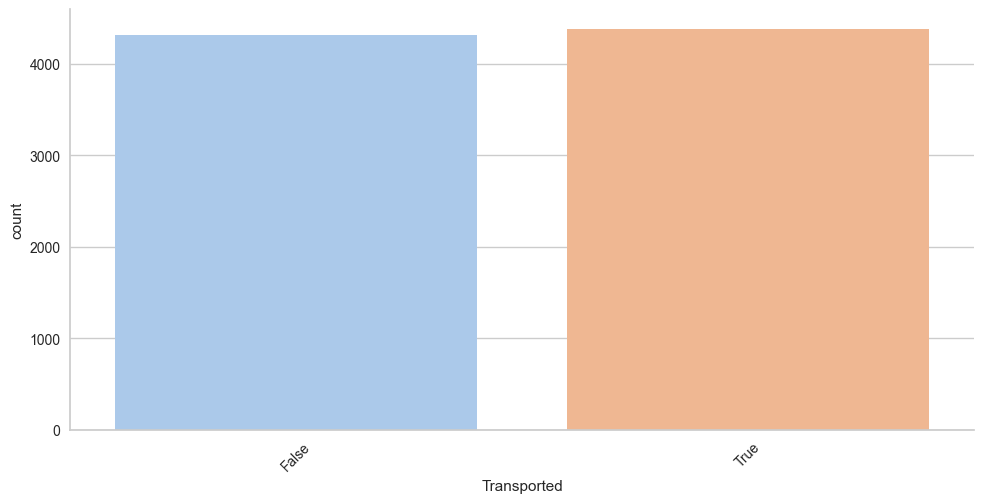

In [14]:
ax = sns.catplot(x= 'Transported', kind="count", palette="pastel", data=df_train, aspect = 20/10)

ax.set_xticklabels(rotation=45)

# **EDA**

* Visualización de las variables

In [15]:
cat_cols= df_train.select_dtypes(include=['object','category']).columns
num_cols = df_train.select_dtypes(exclude=['object','category']).columns

1. Numéricas

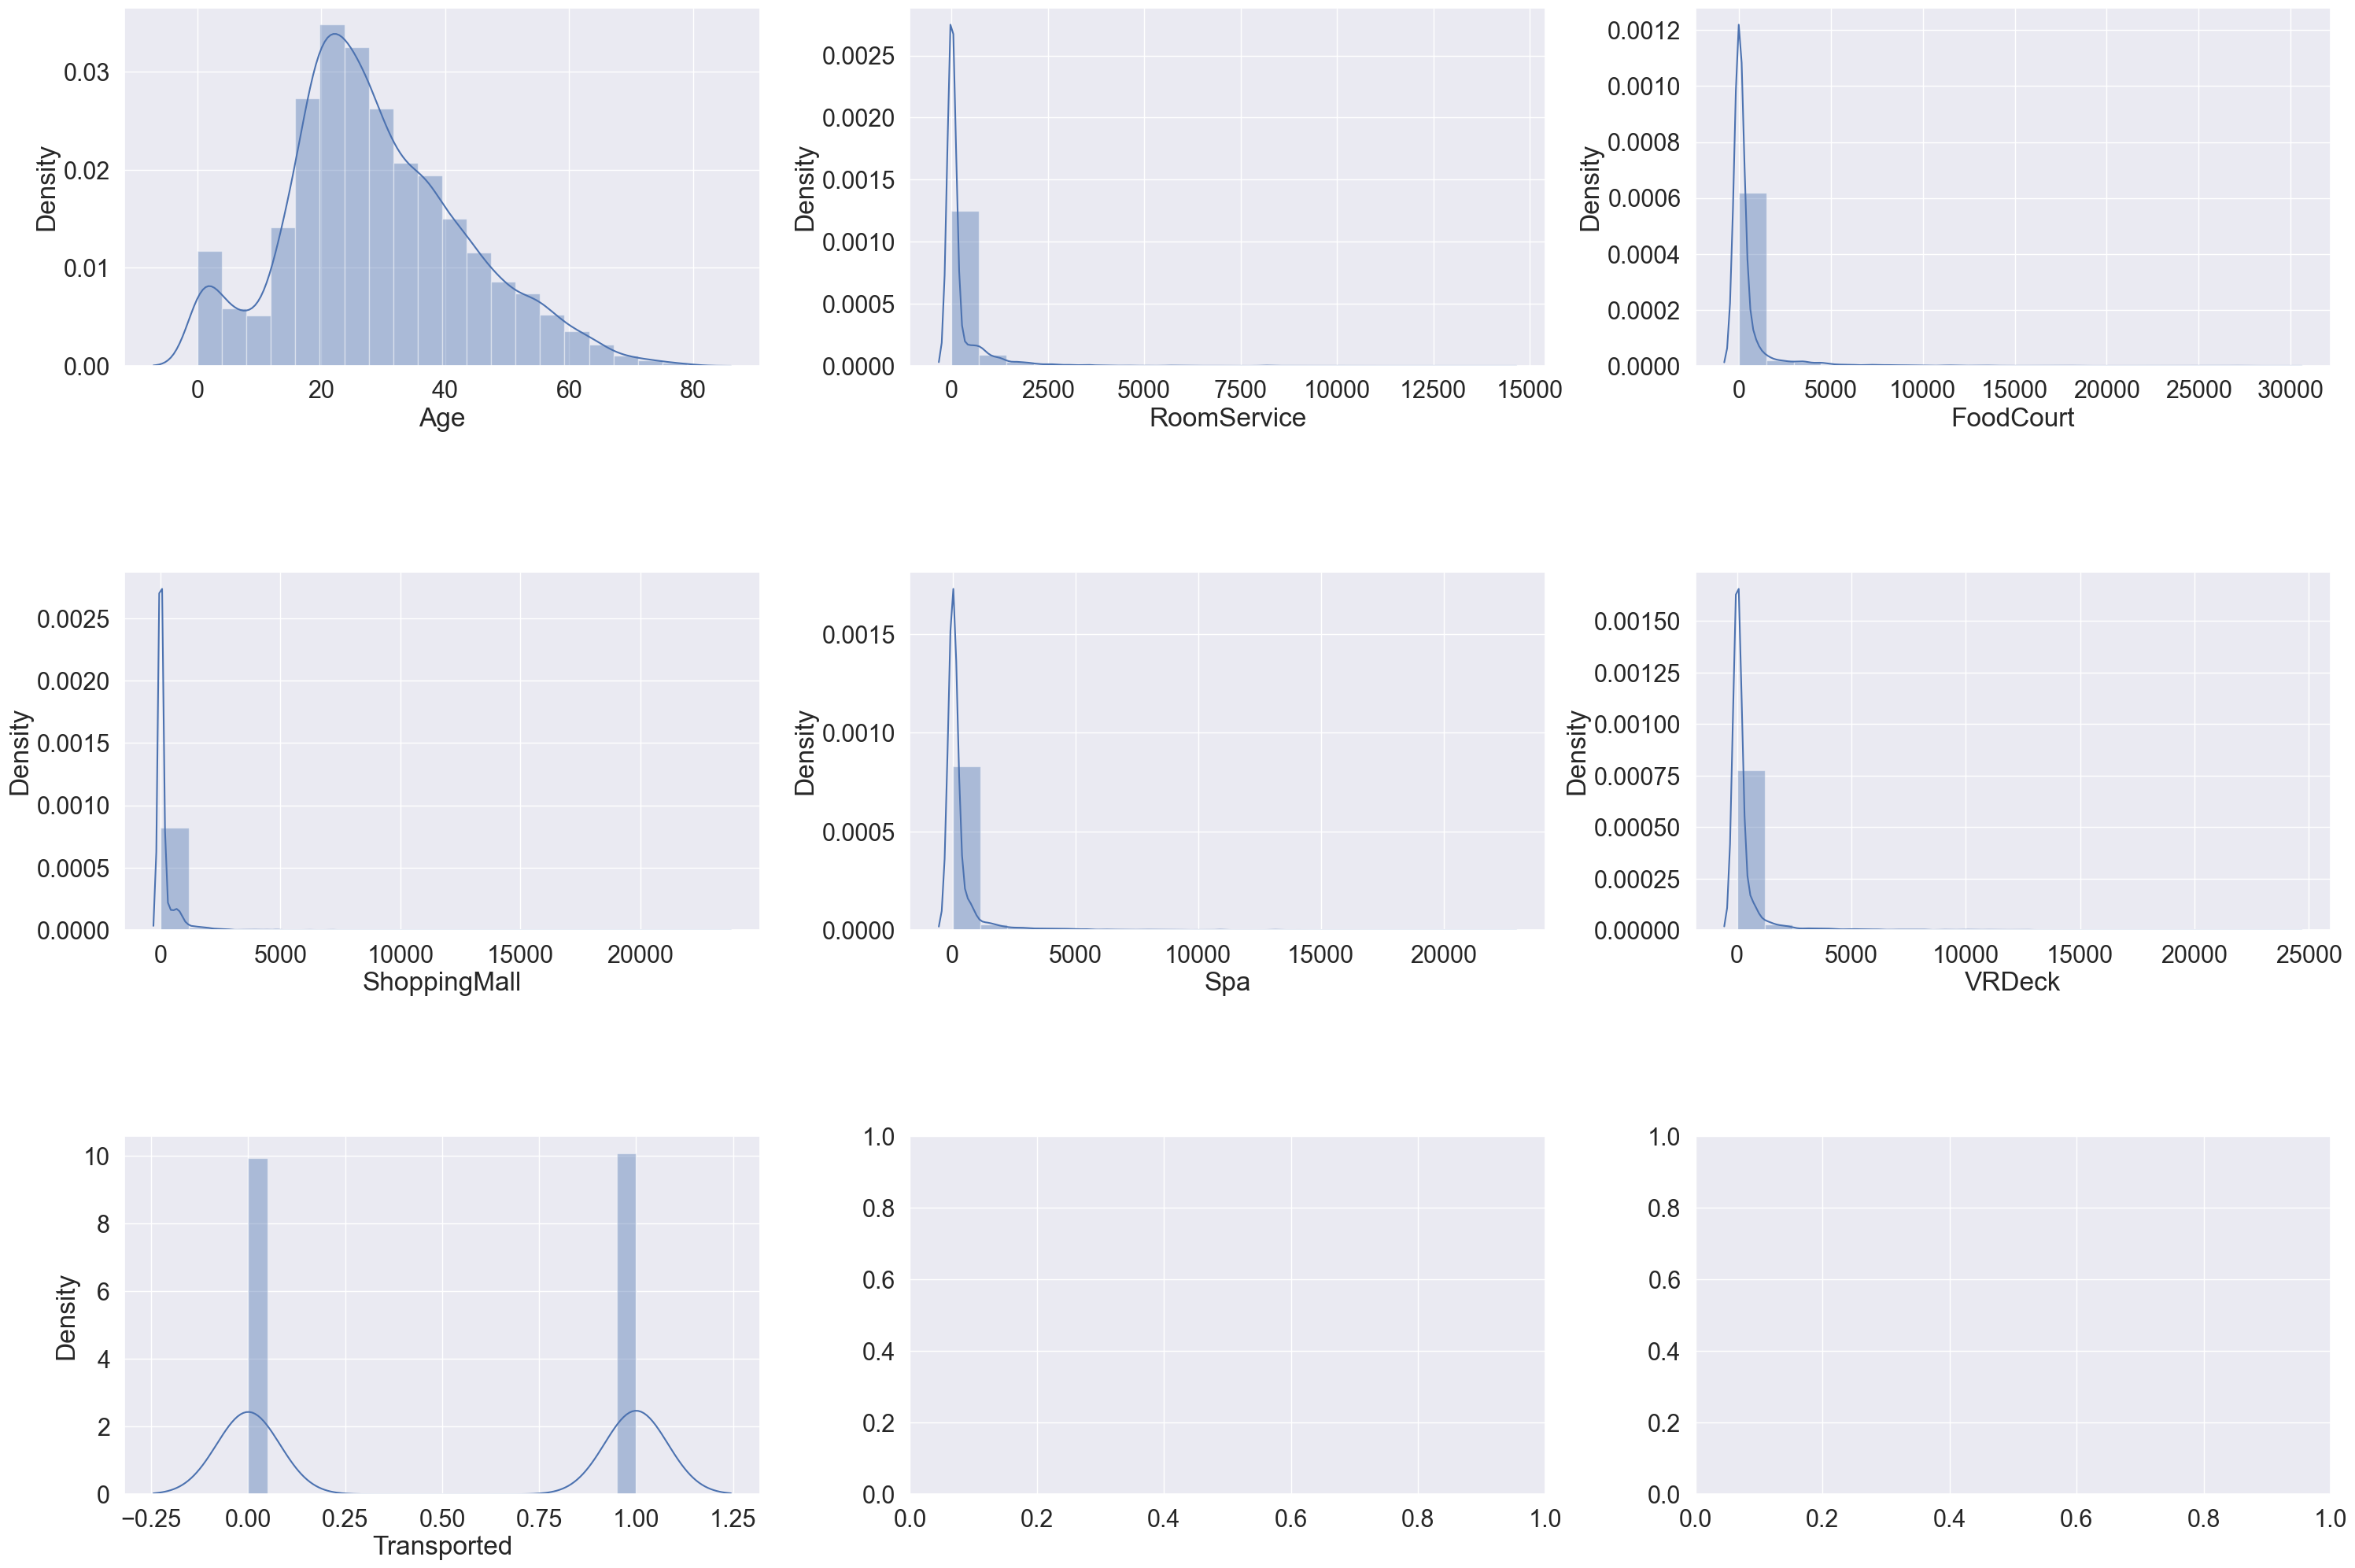

In [16]:
sns.set(font_scale=2)

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(30, 20))
axs = axs.flatten() 

index = 0
for k,v in df_train[num_cols].items(): 
    if  (k == 'permanencia'):
        sns.countplot(v, ax=[9])
    else:
        sns.distplot(v, bins=20, ax=axs[index])
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

* La variable Age tiene el pico en 25 años. Podemos observar como se pueden realizar grupos según las edades.
* Las otras variables son servicios dentro de la nave. Los pasajeros no consumen dichos servicios. Es posible que si realizamos un estudio más profundo se puedan transformar para que aporten más información.

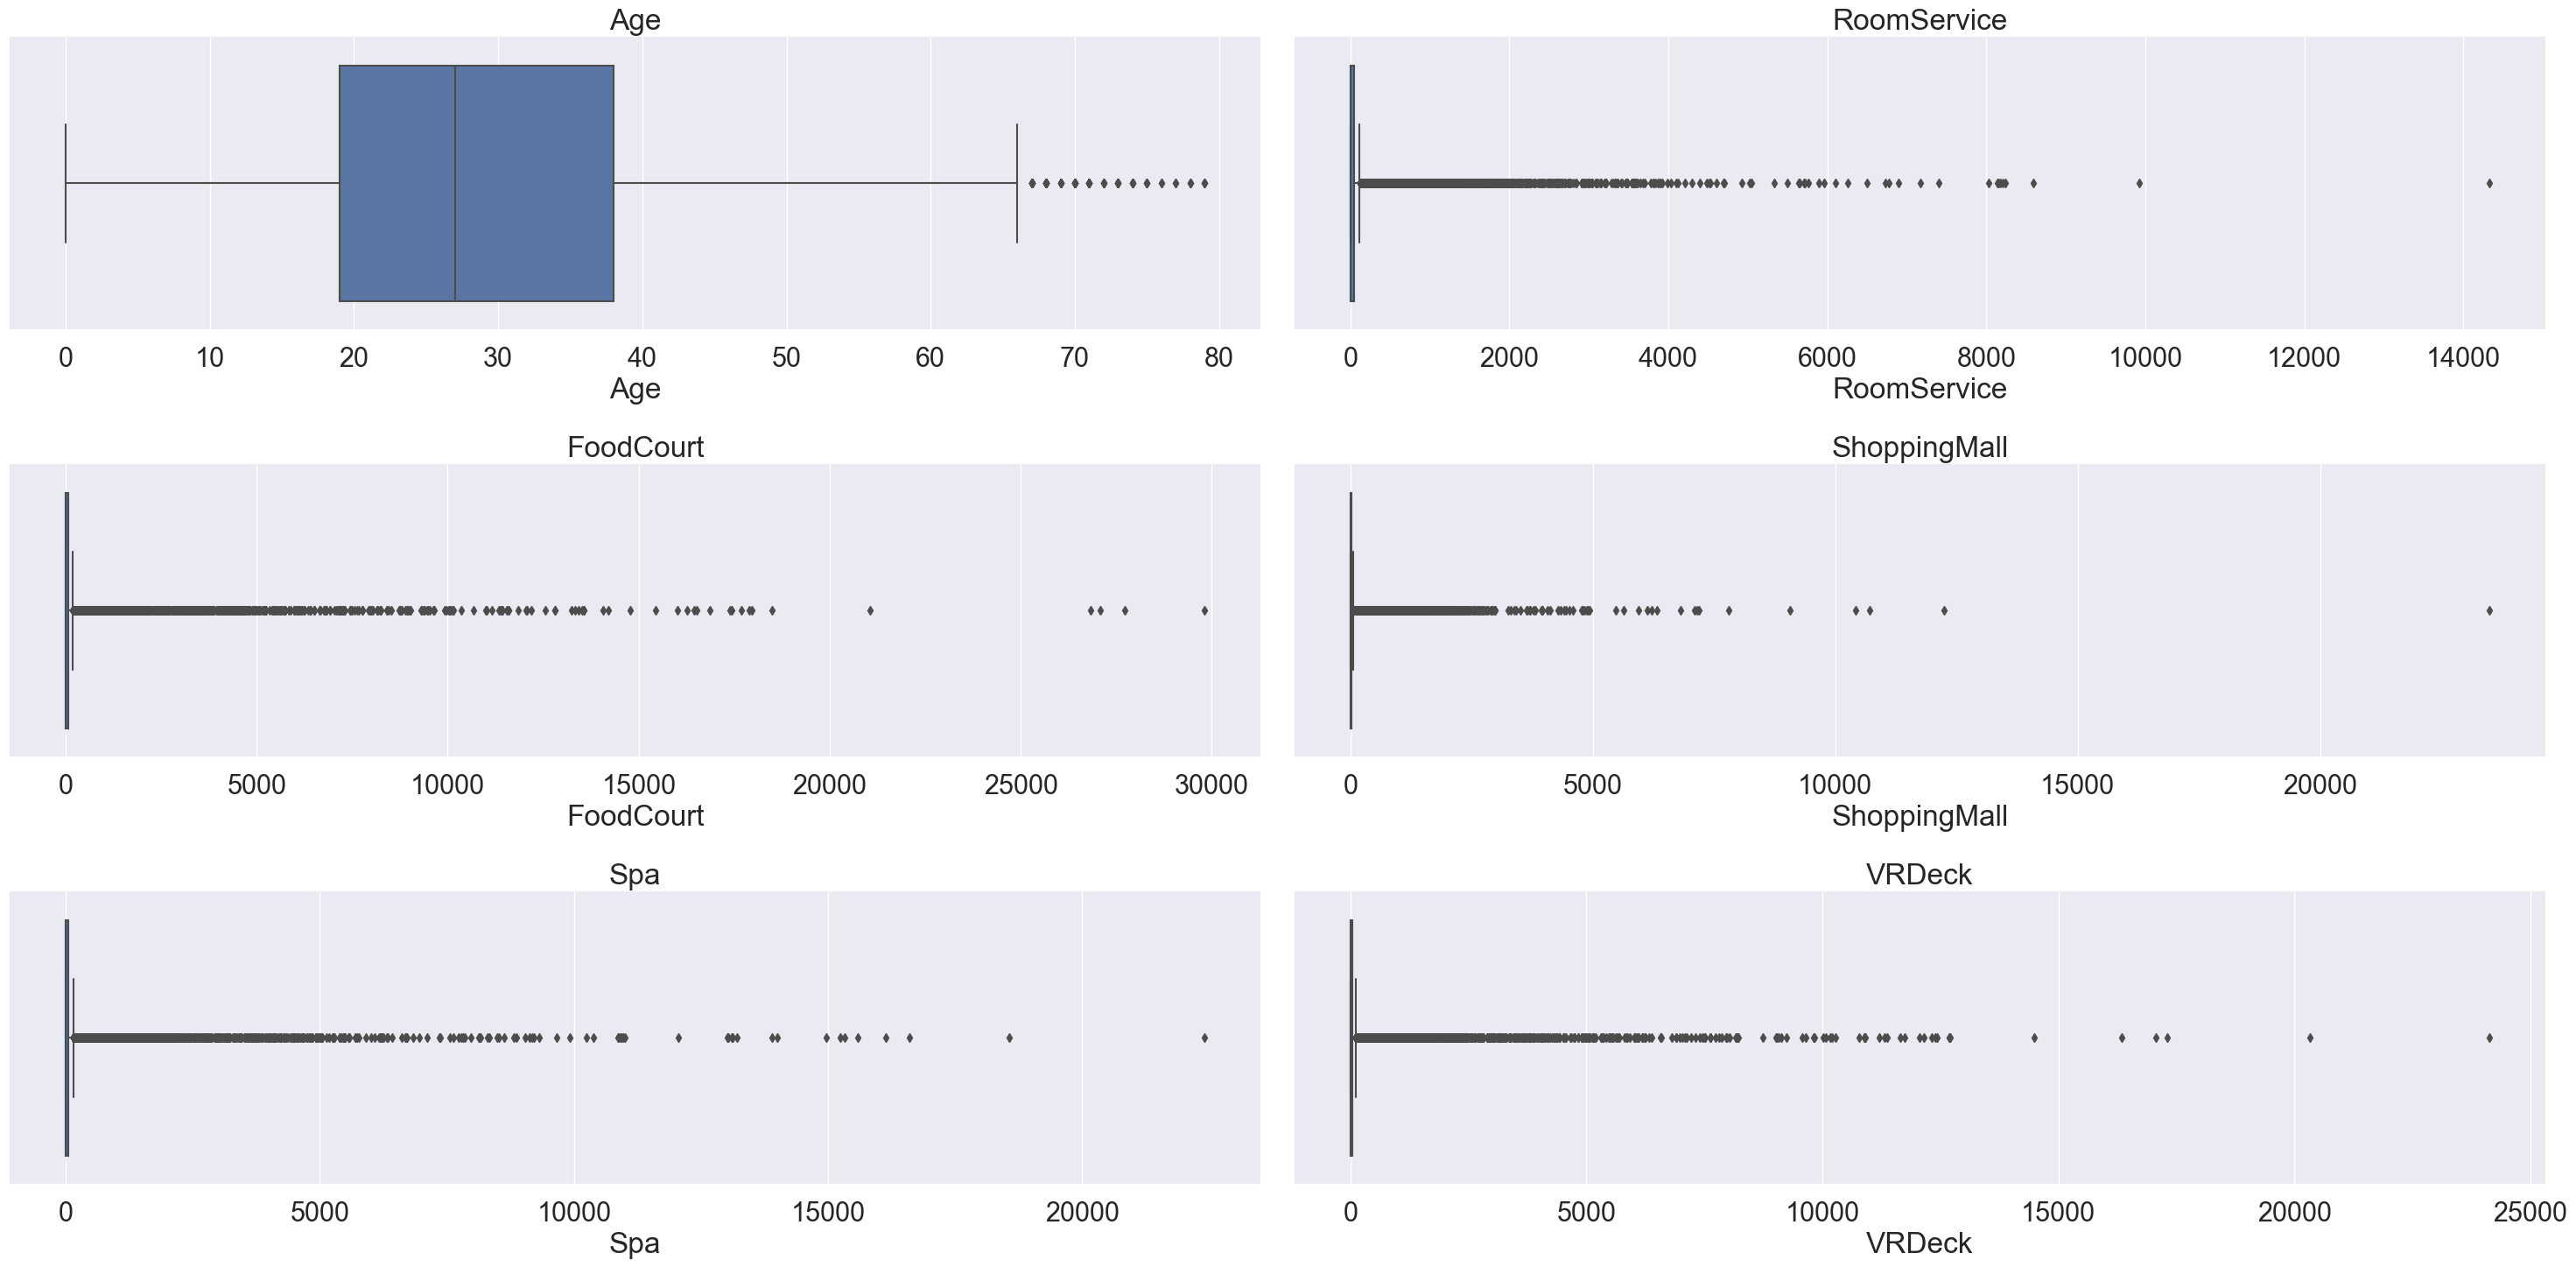

In [17]:
fig, axs = plt.subplots(3, 2, figsize=(30, 15))

for i, ax in enumerate(axs.flat):
    sns.boxplot(x=df_train[num_cols[i]], ax=ax)
    ax.set_title(num_cols[i])

plt.tight_layout()
plt.show()

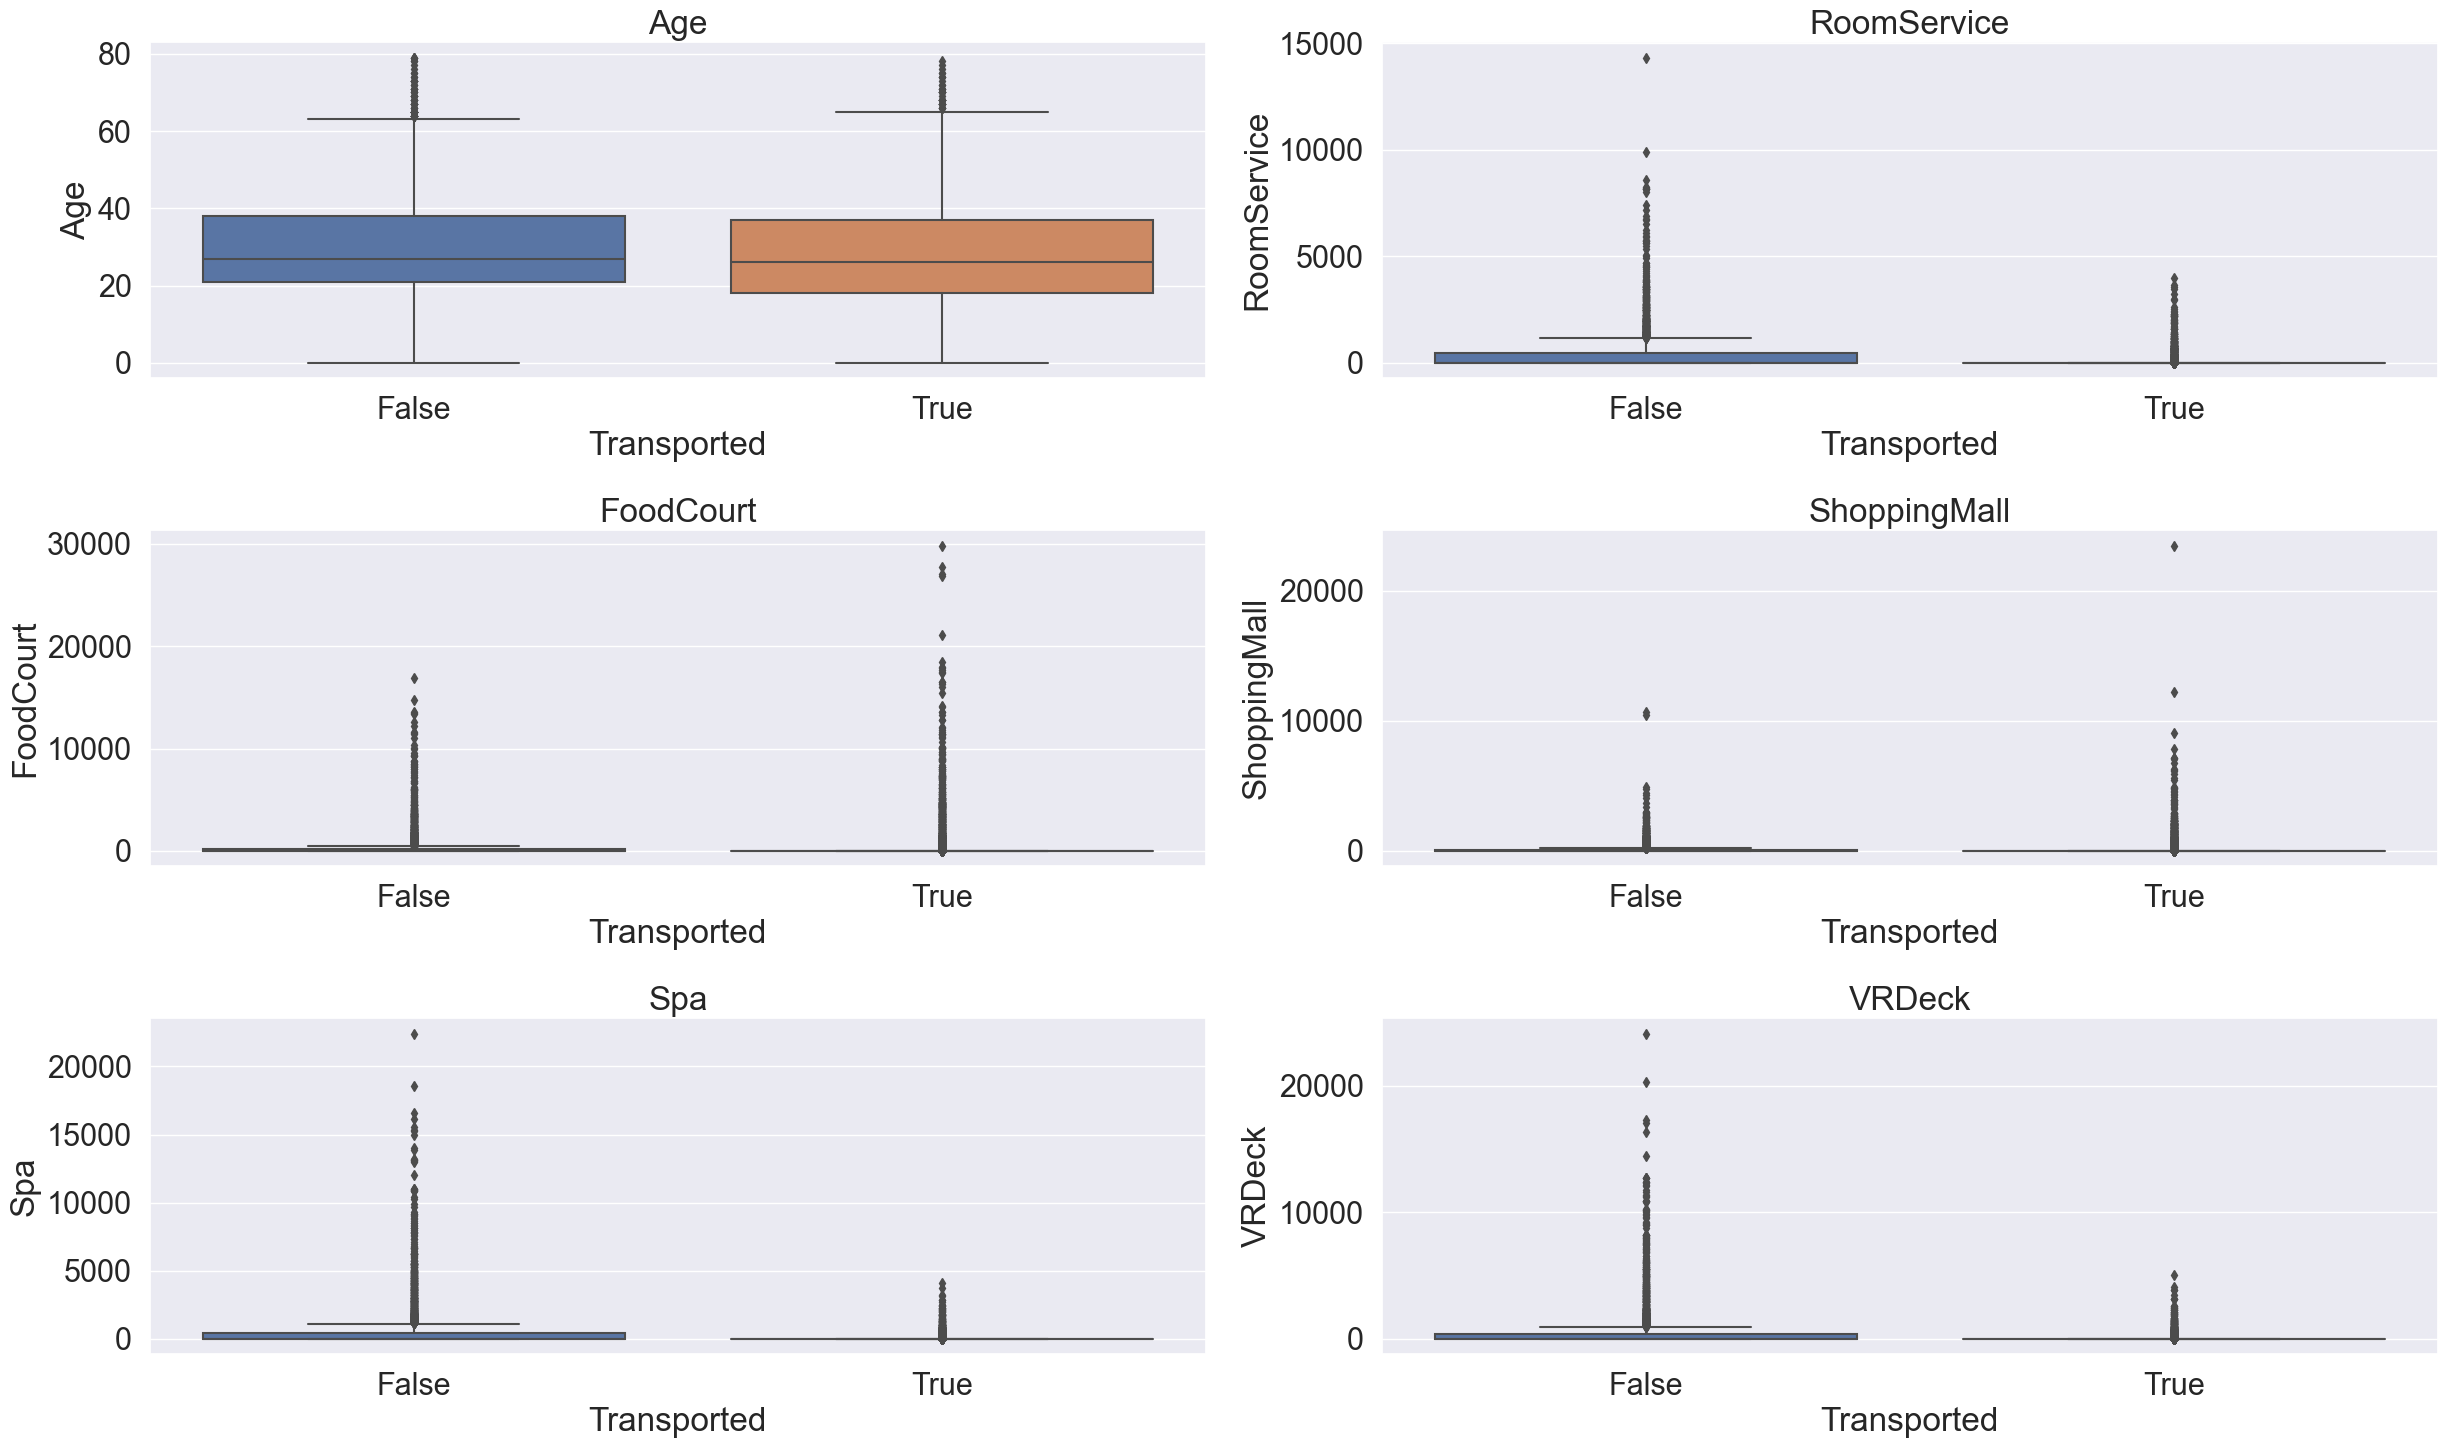

In [18]:
fig, axs = plt.subplots(3, 2, figsize=(25, 15))

for i, ax in enumerate(axs.flat):
    sns.boxplot(x= df_train['Transported'], y=df_train[num_cols[i]], ax=ax)
    ax.set_title(num_cols[i])

plt.tight_layout()
plt.show()

2. Categóricas

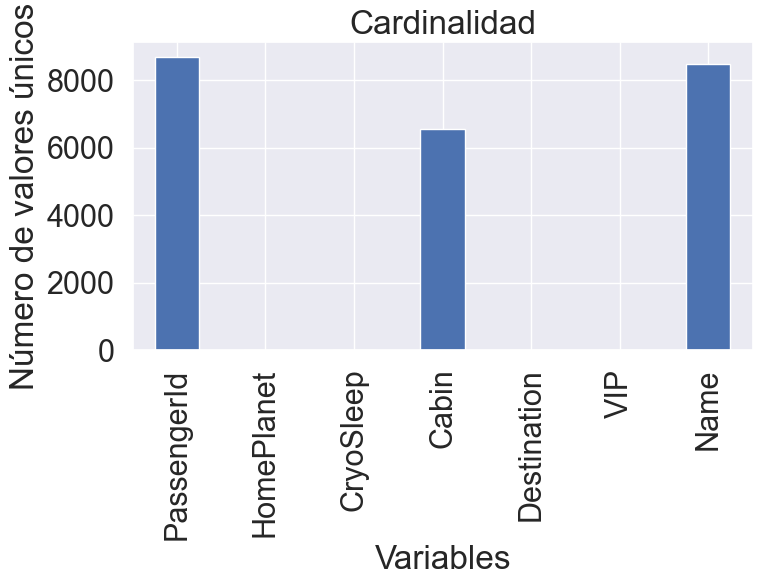

In [19]:
df_train.select_dtypes(include = 'object').nunique().plot.bar(figsize=(8,4))
plt.ylabel('Número de valores únicos')
plt.xlabel('Variables')
plt.title('Cardinalidad')
plt.show()

In [20]:
cat_cols2 = ['HomePlanet','CryoSleep','Destination','VIP']

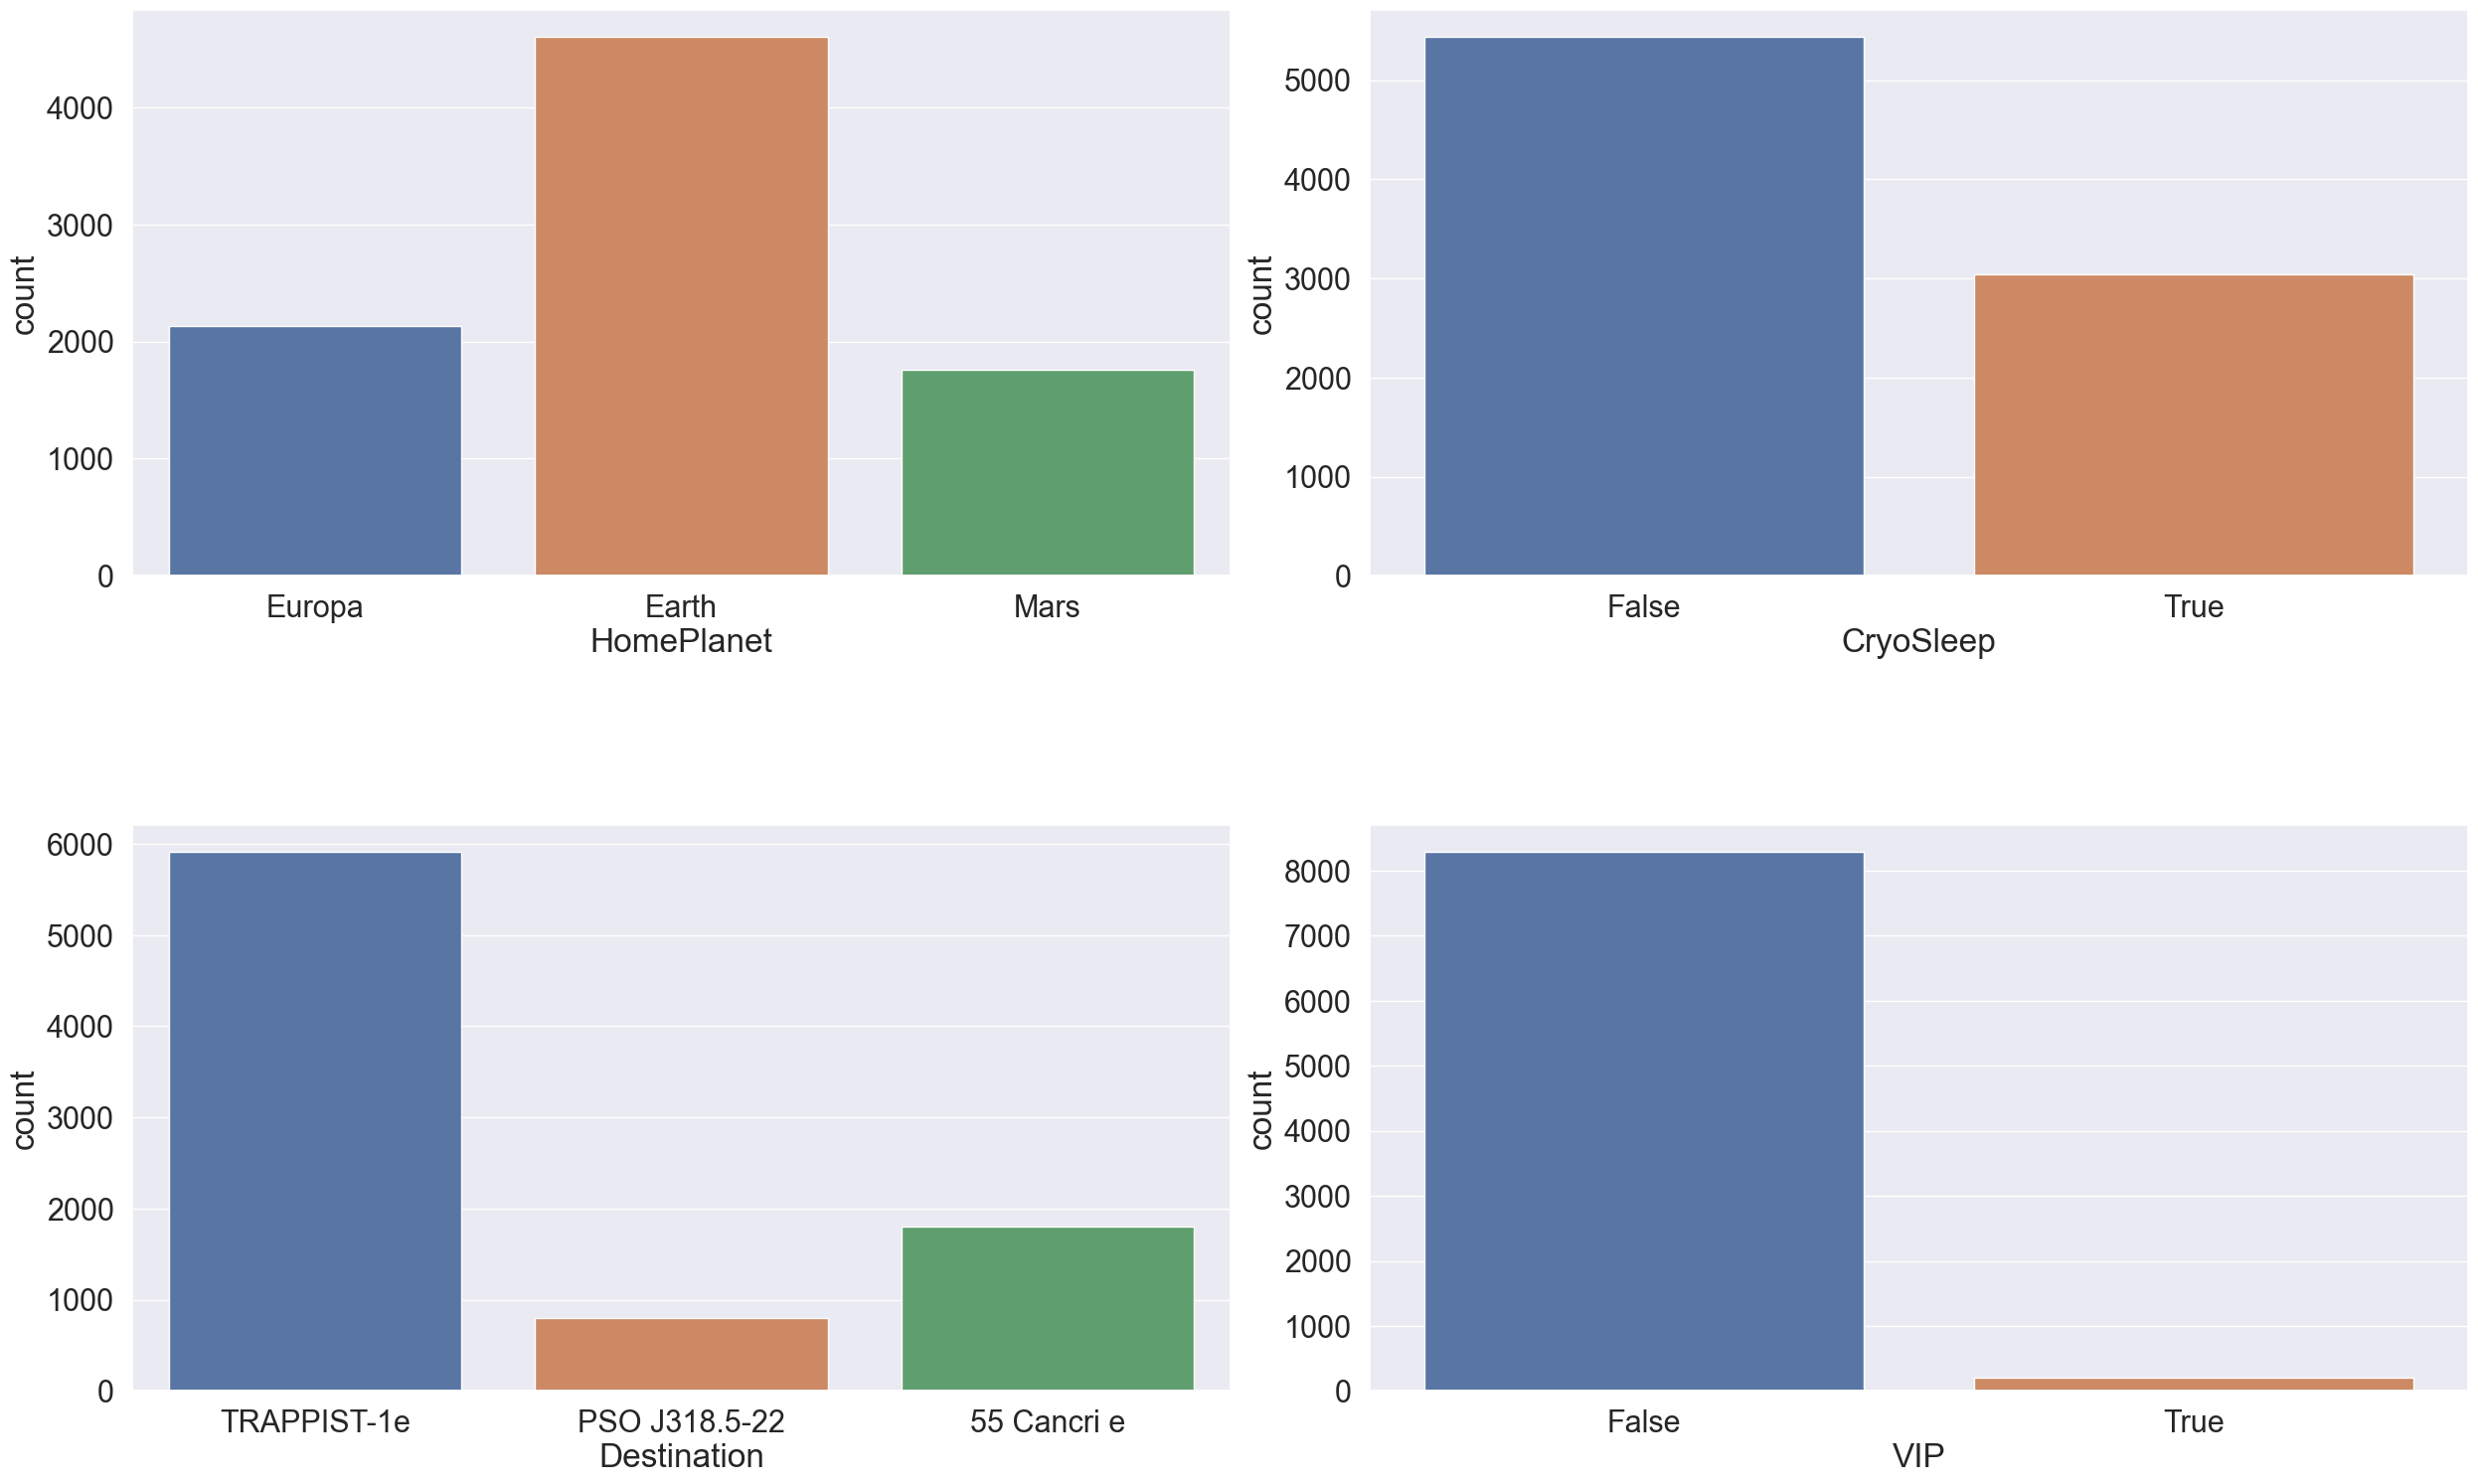

In [21]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(25, 15))
axs = axs.flatten() # 

index = 0
for k,v in df_train[cat_cols2].items(): 
    sns.countplot(v, ax=axs[index])
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

La variable VIP va aportar muy poco al modelo ya que casi todos sus valores son False. 

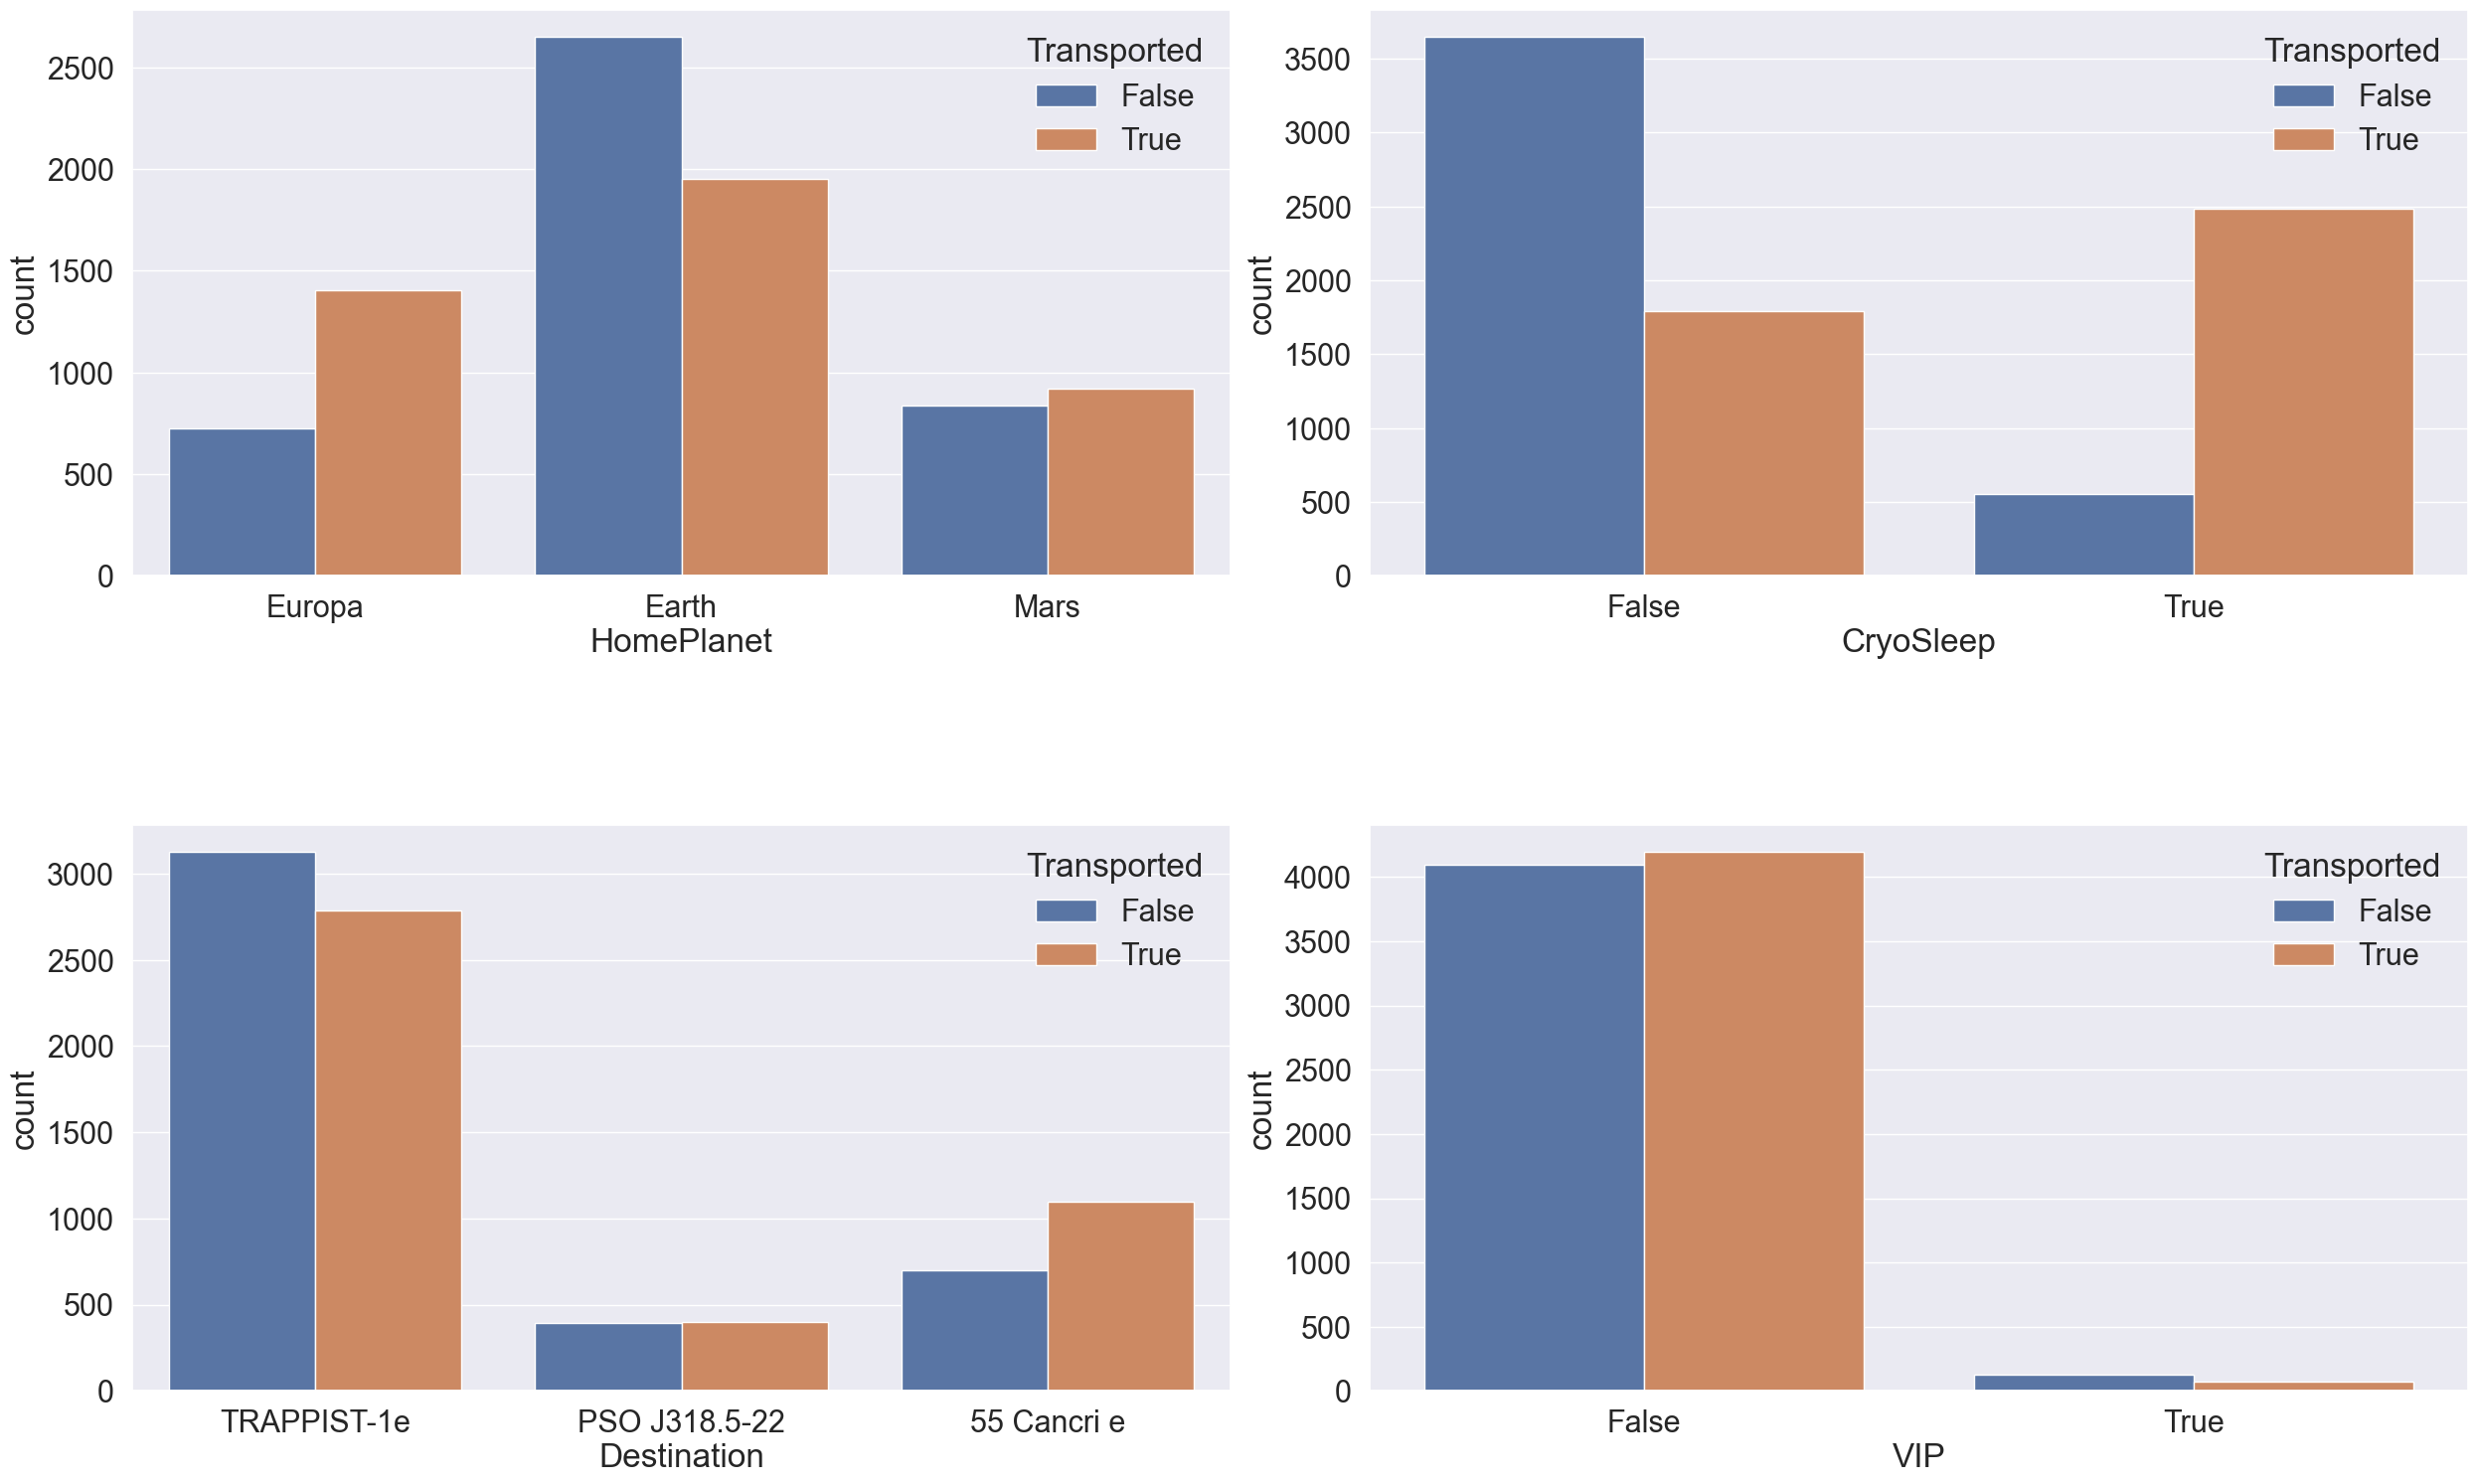

In [22]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(25, 15))
axs = axs.flatten() 

index = 0
for k,v in df_train[cat_cols2].items(): 
    sns.countplot(x=v, hue=df_train['Transported'], ax=axs[index])
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

* Voy a realizar alguna transoformación para poder lograr una mejor clasificación. 

In [23]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


* PassengerId

In [24]:
df_train['Group'] = df_train['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
df_test['Group'] = df_test['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)

In [25]:
df_train['Group_size']=df_train['Group'].map(lambda x: pd.concat([df_train['Group']]).value_counts()[x])
df_test['Group_size']=df_test['Group'].map(lambda x: pd.concat([df_test['Group']]).value_counts()[x])

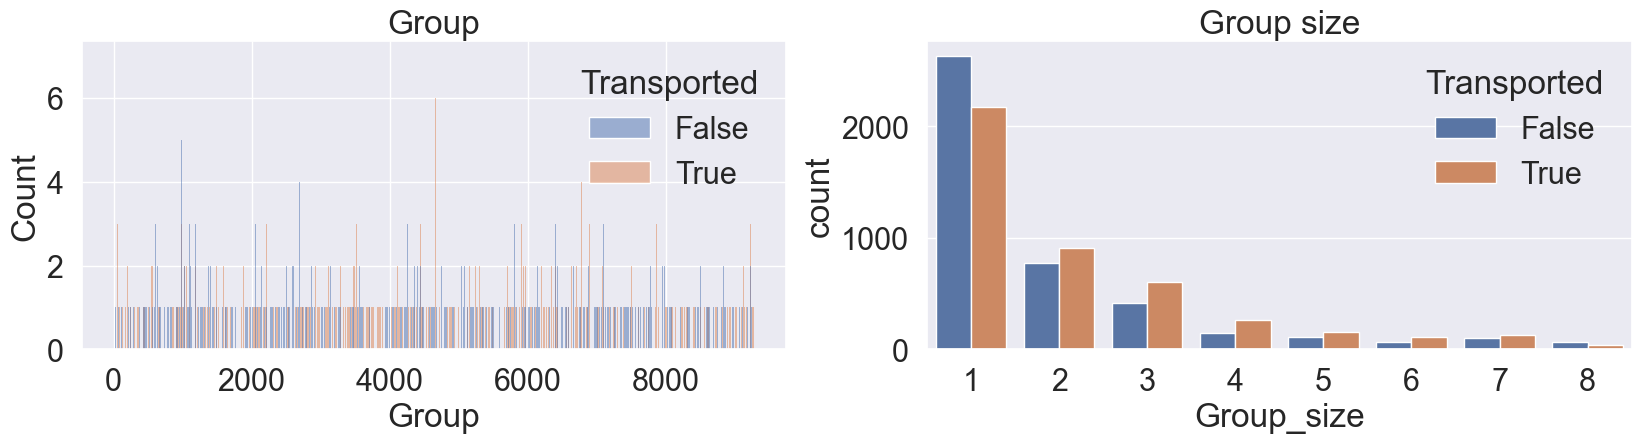

In [26]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=df_train, x='Group', hue='Transported', binwidth=1)
plt.title('Group')

plt.subplot(1,2,2)
sns.countplot(data=df_train, x='Group_size', hue='Transported')
plt.title('Group size')
fig.tight_layout()

plt.show()

Se puede observar como hay una gran cantidad de personas que viajan solas. Voy a crear una variable con dicha información.

In [27]:
df_train['Solo']=(df_train['Group_size']==1).astype(int)
df_test['Solo']=(df_test['Group_size']==1).astype(int)

* Age

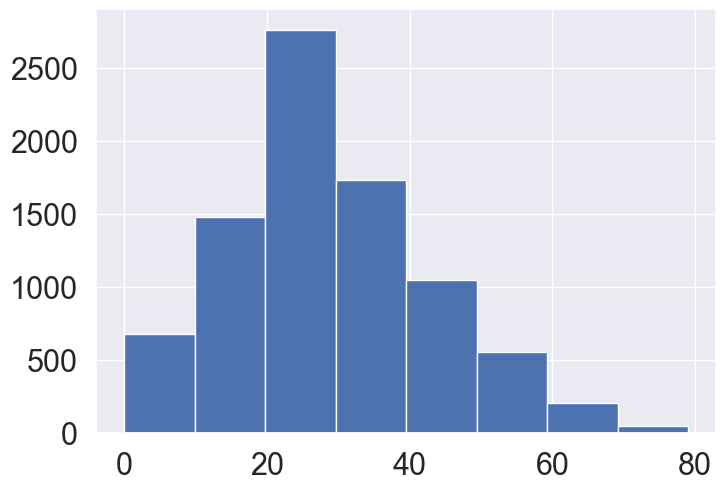

In [28]:
plt.hist(df_train['Age'], bins=8)
plt.show()

In [29]:
df_train['Age_group']=np.nan
df_train.loc[df_train['Age']<=12,'Age_group']='Age_0-12'
df_train.loc[(df_train['Age']>12) & (df_train['Age']<18),'Age_group']='Age_13-17'
df_train.loc[(df_train['Age']>=18) & (df_train['Age']<=25),'Age_group']='Age_18-25'
df_train.loc[(df_train['Age']>25) & (df_train['Age']<=30),'Age_group']='Age_26-30'
df_train.loc[(df_train['Age']>30) & (df_train['Age']<=50),'Age_group']='Age_31-50'
df_train.loc[df_train['Age']>50,'Age_group']='Age_51+'

df_test['Age_group']=np.nan
df_test.loc[df_test['Age']<=12,'Age_group']='Age_0-12'
df_test.loc[(df_test['Age']>12) & (df_test['Age']<18),'Age_group']='Age_13-17'
df_test.loc[(df_test['Age']>=18) & (df_test['Age']<=25),'Age_group']='Age_18-25'
df_test.loc[(df_test['Age']>25) & (df_test['Age']<=30),'Age_group']='Age_26-30'
df_test.loc[(df_test['Age']>30) & (df_test['Age']<=50),'Age_group']='Age_31-50'
df_test.loc[df_train['Age']>50,'Age_group']='Age_51+'

* Name

In [30]:
df_train['Name'].fillna('Unknown Unknown', inplace=True)
df_test['Name'].fillna('Unknown Unknown', inplace=True)

# New feature - Surname
df_train['Surname']=df_train['Name'].str.split().str[-1]
df_test['Surname']=df_test['Name'].str.split().str[-1]

In [31]:
df_train['Family_size']=df_train['Surname'].map(lambda x: pd.concat([df_train['Surname'],df_test['Surname']]).value_counts()[x])
df_test['Family_size']=df_test['Surname'].map(lambda x: pd.concat([df_train['Surname'],df_test['Surname']]).value_counts()[x])

In [32]:
df_train.loc[df_train['Surname']=='Unknown','Surname']=np.nan
df_train.loc[df_train['Family_size']>100,'Family_size']=np.nan
df_test.loc[df_test['Surname']=='Unknown','Surname']=np.nan
df_test.loc[df_test['Family_size']>100,'Family_size']=np.nan

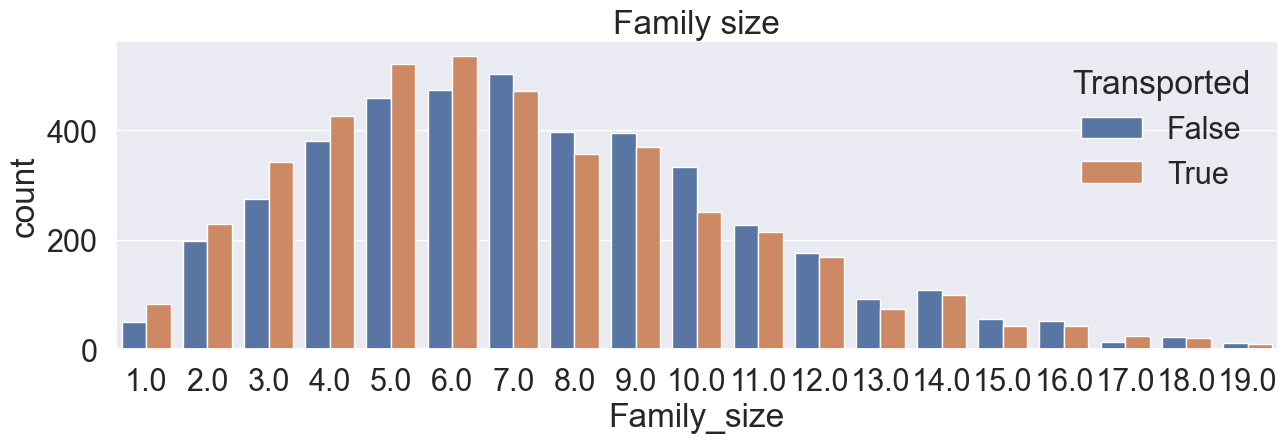

In [33]:
# New feature distribution
plt.figure(figsize=(15,4))
sns.countplot(data=df_train, x='Family_size', hue='Transported')
plt.title('Family size')
plt.show()

* Variables que se relacionan con el gasto dentro de la nave 

In [34]:
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

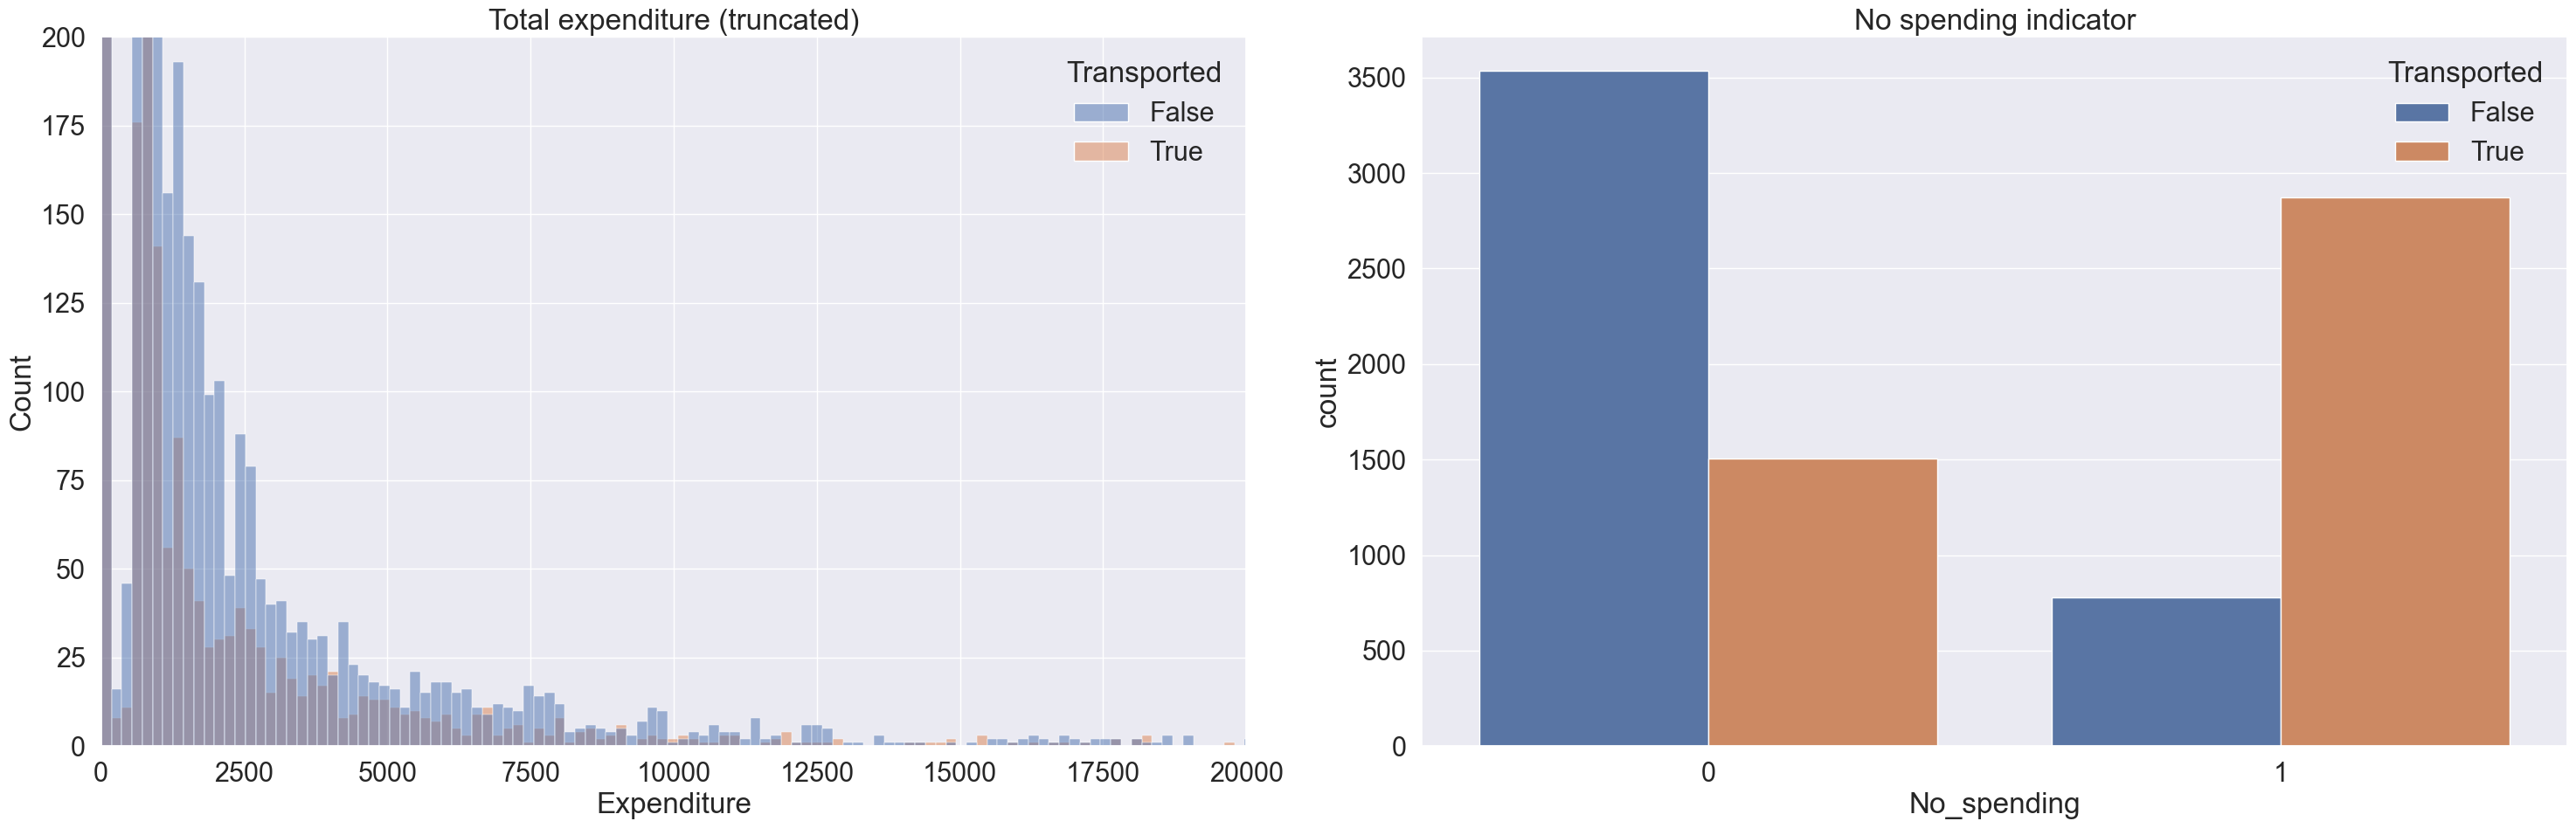

In [35]:
# New features - training set
df_train['Expenditure']=df_train[exp_feats].sum(axis=1)
df_train['No_spending']=(df_train['Expenditure']==0).astype(int)

# New features - test set
df_test['Expenditure']=df_test[exp_feats].sum(axis=1)
df_test['No_spending']=(df_test['Expenditure']==0).astype(int)

# Plot distribution of new features
fig=plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
sns.histplot(data=df_train, x='Expenditure', hue='Transported', bins=200)
plt.title('Total expenditure (truncated)')
plt.ylim([0,200])
plt.xlim([0,20000])

plt.subplot(1,2,2)
sns.countplot(data=df_train, x='No_spending', hue='Transported')
plt.title('No spending indicator')
fig.tight_layout()
plt.show()

* Cabin

In [36]:
df_train['Cabin'].fillna('Z/3333/Z', inplace=True)
df_test['Cabin'].fillna('Z/3333/Z', inplace=True)

In [37]:
df_train['deck_cabin'] = df_train['Cabin'].apply(lambda x: x.split('/')[0])
df_train['num_cabin'] = df_train['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
df_train['side_cabin'] = df_train['Cabin'].apply(lambda x: x.split('/')[2])

df_test['deck_cabin'] = df_test['Cabin'].apply(lambda x: x.split('/')[0])
df_test['num_cabin'] = df_test['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
df_test['side_cabin'] = df_test['Cabin'].apply(lambda x: x.split('/')[2])

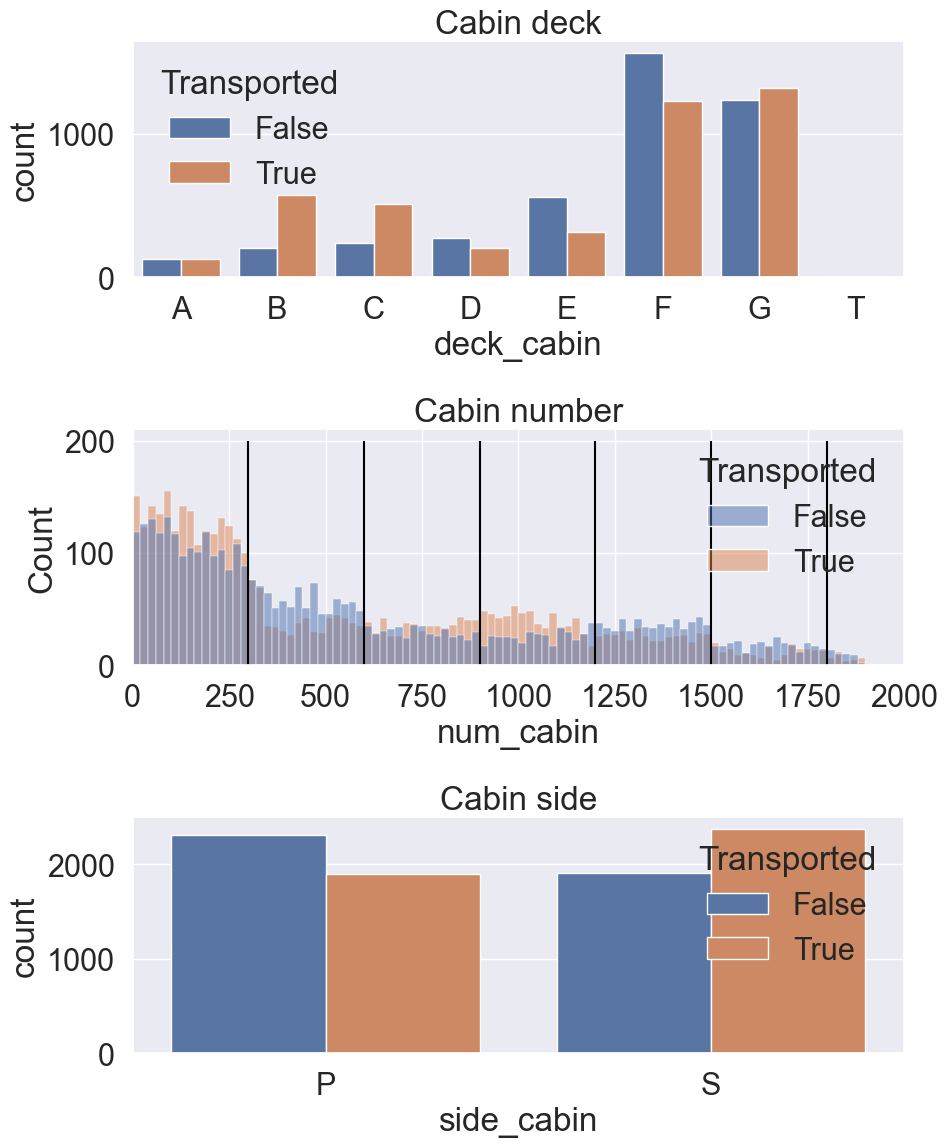

In [38]:
#Deck
fig=plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
sns.countplot(data=df_train, x='deck_cabin', hue='Transported', order=['A','B','C','D','E','F','G','T'])
plt.title('Cabin deck')

#Cabin
df_train[['num_cabin']] = df_train[['num_cabin']] .astype(int)

plt.subplot(3,1,2)
sns.histplot(data=df_train, x='num_cabin', hue='Transported',binwidth=20)
plt.vlines(300, ymin=0, ymax=200, color='black')
plt.vlines(600, ymin=0, ymax=200, color='black')
plt.vlines(900, ymin=0, ymax=200, color='black')
plt.vlines(1200, ymin=0, ymax=200, color='black')
plt.vlines(1500, ymin=0, ymax=200, color='black')
plt.vlines(1800, ymin=0, ymax=200, color='black')
plt.title('Cabin number')
plt.xlim([0,2000])

#Side
plt.subplot(3,1,3)
sns.countplot(data=df_train, x='side_cabin', hue='Transported', order=['P','S'])
plt.title('Cabin side')
fig.tight_layout()


plt.show()

In [39]:
df_train.loc[df_train['deck_cabin']=='Z', 'deck_cabin']=np.nan
df_train.loc[df_train['deck_cabin']=='T', 'deck_cabin']=np.nan
df_train.loc[df_train['num_cabin']==3333, 'num_cabin']=np.nan
df_train.loc[df_train['side_cabin']=='Z', 'side_cabin']=np.nan

df_test.loc[df_test['deck_cabin']=='Z', 'deck_cabin']=np.nan
df_test.loc[df_test['deck_cabin']=='T', 'deck_cabin']=np.nan
df_test.loc[df_test['num_cabin']==3333, 'num_cabin']=np.nan
df_test.loc[df_test['side_cabin']=='Z', 'side_cabin']=np.nan

* En deck_cabin la clase T no tiene muestras, solo 5 valores. Podrían ser outliers.
* En num_cabin observamos como se puede dividir la muestra en porciones de 300 valores.
* En side_cabin hay algún Nan.

Devuelvo los valores cambiados a NaN para su correcta transformación. También voy a transformar los valores igual a T de la variable deck_cabin ya que no aportan nada.

In [40]:
df_train['num_cabin_conv']=np.nan
df_train.loc[df_train['num_cabin']<=300,'num_cabin_conv']='Cabina_0-300'
df_train.loc[(df_train['num_cabin']>300) & (df_train['num_cabin']<600),'num_cabin_conv']='Cabina_300-600'
df_train.loc[(df_train['num_cabin']>600) & (df_train['num_cabin']<900),'num_cabin_conv']='Cabina_600-900'
df_train.loc[(df_train['num_cabin']>900) & (df_train['num_cabin']<1200),'num_cabin_conv']='Cabina_900-1200'
df_train.loc[(df_train['num_cabin']>1200) & (df_train['num_cabin']<1500),'num_cabin_conv']='Cabina_1200-1500'
df_train.loc[(df_train['num_cabin']>1500) & (df_train['num_cabin']<1800),'num_cabin_conv']='Cabina_1500-1800'
df_train.loc[df_train['num_cabin']>1800,'num_cabin_conv']='Cabina_1800+'

df_test['num_cabin_conv']=np.nan
df_test.loc[df_test['num_cabin']<=300,'num_cabin_conv']='Cabina_0-300'
df_test.loc[(df_test['num_cabin']>300) & (df_test['num_cabin']<600),'num_cabin_conv']='Cabina_300-600'
df_test.loc[(df_test['num_cabin']>600) & (df_test['num_cabin']<900),'num_cabin_conv']='Cabina_600-900'
df_test.loc[(df_test['num_cabin']>900) & (df_test['num_cabin']<1200),'num_cabin_conv']='Cabina_900-1200'
df_test.loc[(df_test['num_cabin']>1200) & (df_test['num_cabin']<1500),'num_cabin_conv']='Cabina_1200-1500'
df_test.loc[(df_test['num_cabin']>1500) & (df_test['num_cabin']<1800),'num_cabin_conv']='Cabina_1500-1800'
df_test.loc[df_test['num_cabin']>1800,'num_cabin_conv']='Cabina_1800+'


* Voy a separar la variable Target

In [41]:
varObj = df_train['Transported']
del(df_train['Transported'])

In [42]:
varObj = varObj.astype(int)

Voy a unir el train y el test para optimizar el tratamiento de nulos

In [43]:
data=pd.concat([df_train, df_test], axis=0).reset_index(drop=True)

In [44]:
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Solo,Age_group,Surname,Family_size,Expenditure,No_spending,deck_cabin,num_cabin,side_cabin,num_cabin_conv
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,1,Age_31-50,Ofracculy,3.0,0.0,1,B,0.0,P,Cabina_0-300
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,1,Age_18-25,Vines,4.0,736.0,0,F,0.0,S,Cabina_0-300
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,0,Age_51+,Susent,7.0,10383.0,0,A,0.0,S,Cabina_0-300
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,0,Age_31-50,Susent,7.0,5176.0,0,A,0.0,S,Cabina_0-300
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,1,Age_13-17,Santantines,9.0,1091.0,0,F,1.0,S,Cabina_0-300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,...,0,Age_31-50,Peter,10.0,0.0,1,G,1496.0,S,Cabina_1200-1500
12966,9269_01,Earth,False,Z/3333/Z,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,...,1,Age_31-50,Scheron,6.0,1018.0,0,NaN,NaN,NaN,NaN
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,...,1,NaN,Pore,4.0,0.0,1,D,296.0,P,Cabina_0-300
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,...,1,Age_51+,Conale,7.0,3203.0,0,D,297.0,P,Cabina_0-300


* Tratamiento de los Nulos

In [45]:
na_cols=data.columns[data.isna().any()].tolist()

mv=pd.DataFrame(data.isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(data),2)
mv

,Number_missing,Percentage_missing
PassengerId,0,0.00
HomePlanet,288,2.22
CryoSleep,310,2.39
Cabin,0,0.00
Destination,274,2.11
Age,270,2.08
VIP,296,2.28
RoomService,263,2.03
FoodCourt,289,2.23
ShoppingMall,306,2.36


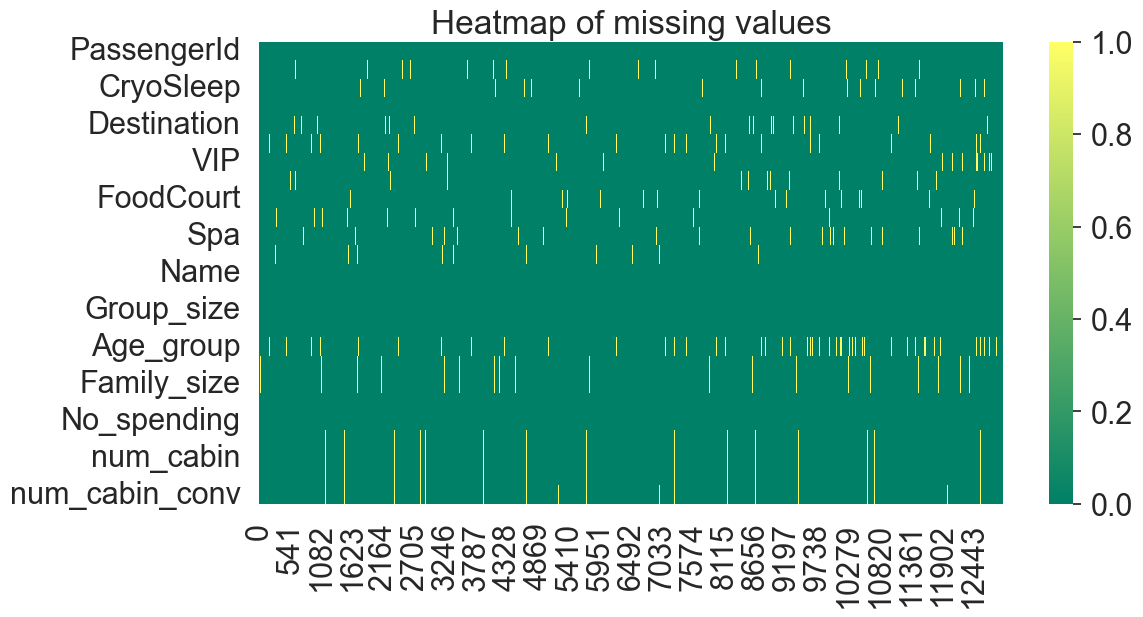

In [46]:
plt.figure(figsize=(12,6))
sns.heatmap(data.isna().T, cmap='summer')
plt.title('Heatmap of missing values')
plt.show()

* Voy a intentar buscar relaciones entre variables para mejorar la precisión en la substitución de nulos

HomePlanet

In [47]:
grupo_homepl=data.groupby(['Group','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
grupo_homepl.head()

HomePlanet,Earth,Europa,Mars
Group,,,
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,2.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0


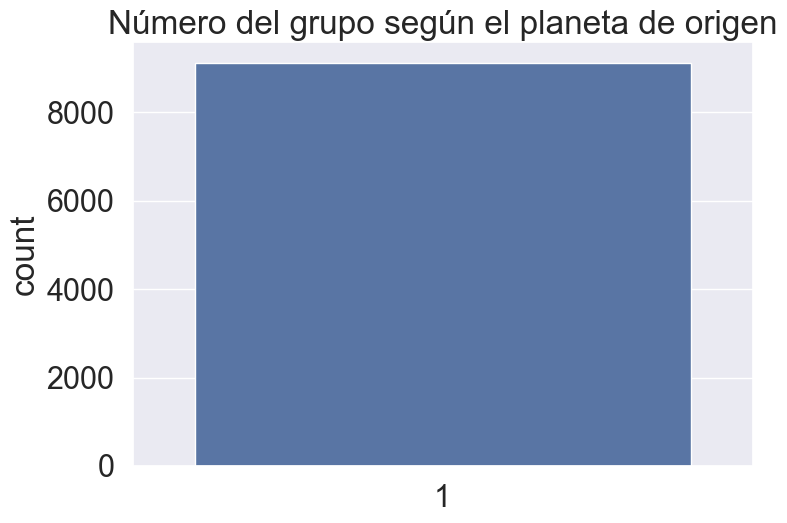

In [48]:
sns.countplot((grupo_homepl>0).sum(axis=1))
plt.title('Número del grupo según el planeta de origen')
plt.show()

* Esto quiere decir que los grupos y el planeta de origen son el mismo. Un forma más efectiva de rellenar los valores faltantes es rellenando los Nan de HomePlanet según el grupo que tiene. 

In [49]:
# Missing values before
HP_bef=data['HomePlanet'].isna().sum()

# Passengers with missing HomePlanet and in a group with known HomePlanet
GHP_index=data[data['HomePlanet'].isna()][(data[data['HomePlanet'].isna()]['Group']).isin(grupo_homepl.index)].index

# Fill corresponding missing values
data.loc[GHP_index,'HomePlanet']=data.iloc[GHP_index,:]['Group'].map(lambda x: grupo_homepl.idxmax(axis=1)[x])

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 288
#HomePlanet missing values after: 157


* Aún quedan valores faltantes, de momento he rellenado casi 100 valores con una precisión del 100%. Voy a seguir relacionando variables.

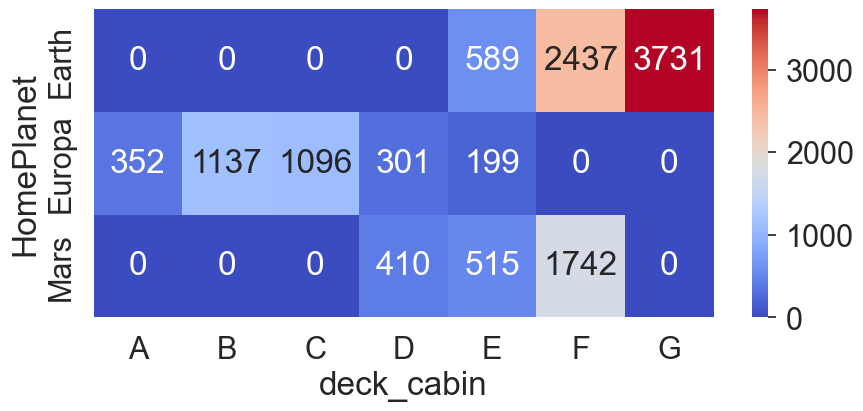

In [50]:
deck_home=data.groupby(['deck_cabin','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

plt.figure(figsize=(10,4))
sns.heatmap(deck_home.T, annot=True, fmt='g', cmap='coolwarm')
plt.show()

* Se puede observar que en los valores de deck_cabin igual a A, B, C y T las personas proceden de Europa.

* Cuando los valores de deck_cabin igual a G las personas proceden de Earth.

* Los otros son multiplaneta.

In [51]:
HP_bef=data['HomePlanet'].isna().sum()

In [52]:
# Decks A, B, C or T came from Europa
data.loc[(data['HomePlanet'].isna()) & (data['deck_cabin'].isin(['A', 'B', 'C', 'T'])), 'HomePlanet']='Europa'

# Deck G came from Earth
data.loc[(data['HomePlanet'].isna()) & (data['deck_cabin']=='G'), 'HomePlanet']='Earth'

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 157
#HomePlanet missing values after: 95


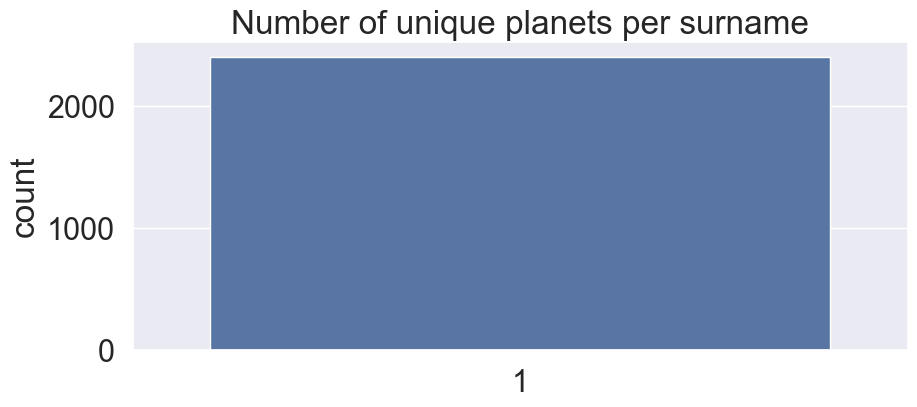

In [53]:
SHP_gb=data.groupby(['Surname','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

# Countplot of unique values
plt.figure(figsize=(10,4))
sns.countplot((SHP_gb>0).sum(axis=1))
plt.title('Number of unique planets per surname')
plt.show()

* Esto quiere decir que todas las personas con el mismo apellido proceden del mismo país. 

In [54]:
# Missing values before
HP_bef=data['HomePlanet'].isna().sum()

In [55]:
# Passengers with missing HomePlanet and in a family with known HomePlanet
SHP_index=data[data['HomePlanet'].isna()][(data[data['HomePlanet'].isna()]['Surname']).isin(SHP_gb.index)].index

# Fill corresponding missing values
data.loc[SHP_index,'HomePlanet']=data.iloc[SHP_index,:]['Surname'].map(lambda x: SHP_gb.idxmax(axis=1)[x])

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 95
#HomePlanet missing values after: 10


In [56]:
data[data['HomePlanet'].isna()][['HomePlanet','Destination','deck_cabin']]

,HomePlanet,Destination,deck_cabin
2274,NaN,TRAPPIST-1e,D
2631,NaN,TRAPPIST-1e,F
3091,NaN,TRAPPIST-1e,F
4548,NaN,TRAPPIST-1e,F
5762,NaN,TRAPPIST-1e,F
8969,NaN,TRAPPIST-1e,E
10583,NaN,TRAPPIST-1e,D
11913,NaN,TRAPPIST-1e,E
12551,NaN,TRAPPIST-1e,F
12725,NaN,TRAPPIST-1e,D


* Todos los valores faltantes de HomePlanet tienen el mismo Destino.

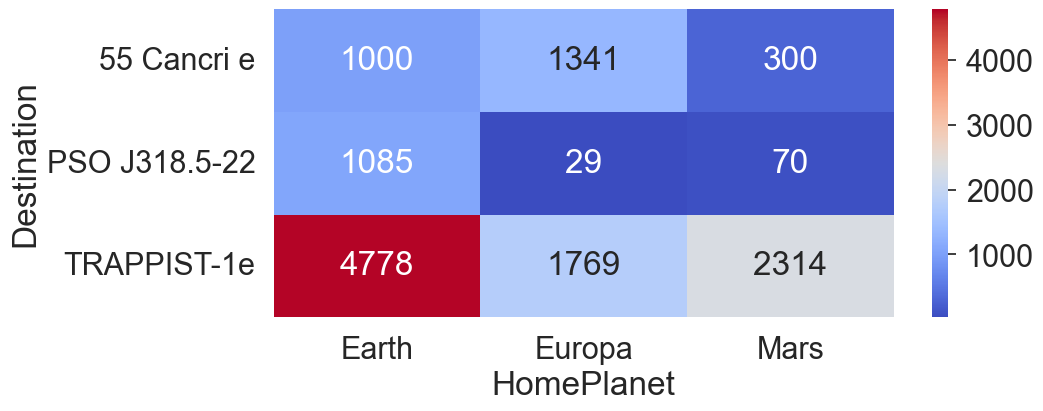

In [57]:
HPD_gb=data.groupby(['HomePlanet','Destination'])['Destination'].size().unstack().fillna(0)

# Heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(HPD_gb.T, annot=True, fmt='g', cmap='coolwarm')
plt.show()

La mayoria de personas que salen de Earth tienen el destino de TRAPPIST-1E. Con lo cual, voy a substituir los valores faltantes de HomePlanet por Earth. Antes hemos observado con la relación de deck_cabin y HomePlanet que el valor Earth solo tenia valores E, F y G en deck_cabin. Con lo cual si existen algun valor que no sea este no voy a poder substituir de esta manera. 

In [58]:
# Missing values before
HP_bef=data['HomePlanet'].isna().sum()
HP_bef

10

In [59]:
# Fill remaining HomePlanet missing values with Earth (if not on deck D) or Mars (if on Deck D)
data.loc[(data['HomePlanet'].isna()) & ~(data['deck_cabin']=='D'), 'HomePlanet']='Earth'

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 10
#HomePlanet missing values after: 3


El último valor faltante tiene Destination = TRAPPIST-1e y Destination = D. Si miramos Destination = D puede ser Europa o Earth, voy a realizar la substitución por Mars ya que tiene más probabilidades de ser así que no de salir de Europa. 

In [60]:
data.loc[(data['HomePlanet'].isna()), 'HomePlanet']='Mars'

print('#HomePlanet missing values:',data['HomePlanet'].isna().sum())

#HomePlanet missing values: 0


Destination

Después de muchos intentos no he encontrado relaciones entre variables, con lo cual, voy a substituir por la moda. Anteriormente he observado que TRAPPIST-1e es el valor con más aparición.

In [61]:
data['Destination'].isna().sum()

274

In [62]:
data.loc[(data['Destination'].isna()), 'Destination']='TRAPPIST-1e'

print('#Destination missing values:',data['Destination'].isna().sum())

#Destination missing values: 0


Cabin

* Side_cabin

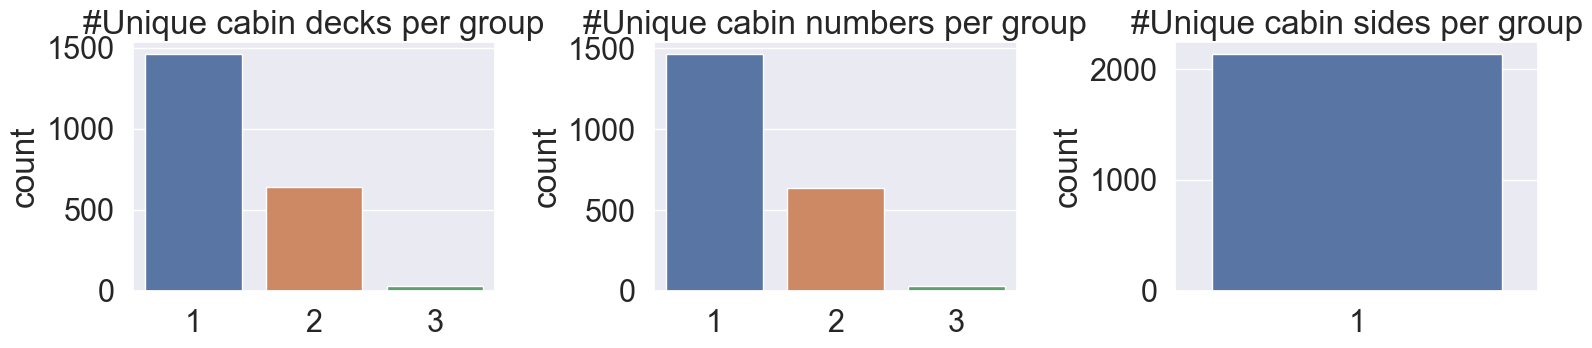

In [63]:
# Joint distribution of Group and Cabin features
GCD_gb=data[data['Group_size']>1].groupby(['Group','deck_cabin'])['deck_cabin'].size().unstack().fillna(0)
GCN_gb=data[data['Group_size']>1].groupby(['Group','num_cabin'])['num_cabin'].size().unstack().fillna(0)
GCS_gb=data[data['Group_size']>1].groupby(['Group','side_cabin'])['side_cabin'].size().unstack().fillna(0)

# Countplots
fig=plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.countplot((GCD_gb>0).sum(axis=1))
plt.title('#Unique cabin decks per group')

plt.subplot(1,3,2)
sns.countplot((GCN_gb>0).sum(axis=1))
plt.title('#Unique cabin numbers per group')

plt.subplot(1,3,3)
sns.countplot((GCS_gb>0).sum(axis=1))
plt.title('#Unique cabin sides per group')
fig.tight_layout()

plt.show()

Podemos ver como todos los valores únicos de side_cabin tienen el mismo grupo, por lo tanot se puede convertir los Nan de una forma más precisa.

In [64]:
CS_bef=data['side_cabin'].isna().sum()
print(CS_bef)

299


In [65]:
GCS_index=data[data['side_cabin'].isna()][(data[data['side_cabin'].isna()]['Group']).isin(GCS_gb.index)].index

# Fill corresponding missing values
data.loc[GCS_index,'side_cabin']=data.iloc[GCS_index,:]['Group'].map(lambda x: GCS_gb.idxmax(axis=1)[x])

# Print number of missing values left
print('#Cabin_side missing values before:',CS_bef)
print('#Cabin_side missing values after:',data['side_cabin'].isna().sum())

#Cabin_side missing values before: 299
#Cabin_side missing values after: 162


In [66]:
data['side_cabin'].fillna(data['side_cabin'].mode().iloc[0], inplace=True)

* Deck_cabin

In [67]:
data.groupby(['HomePlanet','Destination','Solo','deck_cabin'])['deck_cabin'].size().unstack().fillna(0)

deck_cabin                         A      B      C      D      E       F  \
HomePlanet Destination   Solo                                              
Earth      55 Cancri e   0       0.0    0.0    0.0    0.0   20.0    88.0   
                         1       0.0    0.0    0.0    0.0   47.0   289.0   
           PSO J318.5-22 0       0.0    0.0    0.0    0.0   17.0    65.0   
                         1       0.0    0.0    0.0    0.0   25.0   262.0   
           TRAPPIST-1e   0       0.0    0.0    0.0    0.0  130.0   426.0   
                         1       0.0    0.0    0.0    0.0  358.0  1350.0   
Europa     55 Cancri e   0      90.0  366.0  306.0   58.0   34.0     0.0   
                         1      67.0  141.0  159.0   46.0   34.0     0.0   
           PSO J318.5-22 0       2.0    5.0   10.0    0.0    0.0     0.0   
                         1       0.0    0.0   10.0    0.0    0.0     0.0   
           TRAPPIST-1e   0     151.0  450.0  416.0  118.0   53.0     0.0   
                         1      44.0  179.0  201.0   84.0   82.0     0.0   
Mars       55 Cancri e   0       0.0    0.0    0.0   31.0   15.0   103.0   
                         1       0.0    0.0    0.0   40.0   16.0    92.0   
           PSO J318.5-22 0       0.0    0.0    0.0    8.0    9.0    14.0   
                         1       0.0    0.0    0.0    9.0    7.0    21.0   
           TRAPPIST-1e   0       0.0    0.0    0.0  162.0  213.0   786.0   
                         1       0.0    0.0    0.0  164.0  263.0   743.0   

deck_cabin                          G  
HomePlanet Destination   Solo          
Earth      55 Cancri e   0      264.0  
                         1      269.0  
           PSO J318.5-22 0      227.0  
                         1      466.0  
           TRAPPIST-1e   0     1046.0  
                         1     1509.0  
Europa     55 Cancri e   0        0.0  
                         1        0.0  
           PSO J318.5-22 0        0.0  
                         1        0.0  
           TRAPPIST-1e   0        0.0  
                         1        0.0  
Mars       55 Cancri e   0        0.0  
                         1        0.0  
           PSO J318.5-22 0        0.0  
                         1        0.0  
           TRAPPIST-1e   0        0.0  
                         1        0.0

In [68]:
CD_bef=data['deck_cabin'].isna().sum()
print(CD_bef)

310


In [69]:
# Fill missing values using the mode
na_rows_CD=data.loc[data['deck_cabin'].isna(),'deck_cabin'].index
data.loc[data['deck_cabin'].isna(),'deck_cabin']=data.groupby(['HomePlanet','Destination','Solo'])['deck_cabin'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[na_rows_CD]

# Print number of missing values left
print('#Cabin_deck missing values before:',CD_bef)
print('#Cabin_deck missing values after:',data['deck_cabin'].isna().sum())

#Cabin_deck missing values before: 310
#Cabin_deck missing values after: 0


* Num_cabin

In [70]:
data['num_cabin_conv'] = data['num_cabin_conv'].fillna(data['num_cabin_conv'].mode()[0])

CryoSleep

In [71]:
data.groupby(['No_spending','CryoSleep'])['CryoSleep'].size().unstack().fillna(0)

CryoSleep,False,True
No_spending,,
0,7339.0,0.0
1,740.0,4581.0


In [72]:
# Missing values before
CSL_bef=data['CryoSleep'].isna().sum()

# Fill missing values using the mode
na_rows_CSL=data.loc[data['CryoSleep'].isna(),'CryoSleep'].index
data.loc[data['CryoSleep'].isna(),'CryoSleep']=data.groupby(['No_spending'])['CryoSleep'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[na_rows_CSL]

# Print number of missing values left
print('#CryoSleep missing values before:',CSL_bef)
print('#CryoSleep missing values after:',data['CryoSleep'].isna().sum())

#CryoSleep missing values before: 310
#CryoSleep missing values after: 0


Age

In [73]:
data.groupby(['HomePlanet','No_spending','Solo','deck_cabin'])['Age'].median().unstack().fillna(0)

deck_cabin                      A     B     C     D     E     F     G
HomePlanet No_spending Solo                                          
Earth      0           0      0.0   0.0   0.0   0.0  24.0  25.0  28.0
                       1      0.0   0.0   0.0   0.0  25.0  24.0  26.0
           1           0      0.0   0.0   0.0   0.0   7.0  15.0   9.0
                       1      0.0   0.0   0.0   0.0  21.0  21.5  23.0
Europa     0           0     34.5  34.0  33.0  33.0  34.0   0.0   0.0
                       1     35.0  36.0  35.0  34.0  35.0   0.0   0.0
           1           0     30.0  27.0  28.0  27.0  28.0   0.0   0.0
                       1     37.5  34.0  35.0  31.0  33.0   0.0   0.0
Mars       0           0      0.0   0.0   0.0  30.0  29.0  29.0   0.0
                       1      0.0   0.0   0.0  31.0  28.5  30.0   0.0
           1           0      0.0   0.0   0.0  29.5  26.0  18.0   0.0
                       1      0.0   0.0   0.0  33.0  30.0  29.5   0.0

In [74]:
A_bef=data[exp_feats].isna().sum().sum()
A_bef

1410

In [75]:
data['Age'] = data['Age'].fillna(data.groupby(['HomePlanet', 'No_spending','Solo','deck_cabin'])['Age'].transform('mean'))

In [76]:
print('#Age missing values before:',A_bef)
print('#Age missing values after:',data['Age'].isna().sum())

#Age missing values before: 1410
#Age missing values after: 0


In [77]:
data['Age_group']=np.nan
data.loc[data['Age']<=12,'Age_group']='Age_0-12'
data.loc[(data['Age']>12) & (data['Age']<18),'Age_group']='Age_13-17'
data.loc[(data['Age']>=18) & (data['Age']<=25),'Age_group']='Age_18-25'
data.loc[(data['Age']>25) & (data['Age']<=30),'Age_group']='Age_26-30'
data.loc[(data['Age']>30) & (data['Age']<=50),'Age_group']='Age_31-50'
data.loc[data['Age']>50,'Age_group']='Age_51+'

Family_size

In [78]:
data['Family_size'] = data['Family_size'].fillna(data['Family_size'].mode()[0])

Expednditure 

In [79]:
print('Maximum expenditure of passengers in CryoSleep:',data.loc[data['CryoSleep']==True,exp_feats].sum(axis=1).max())

Maximum expenditure of passengers in CryoSleep: 0.0


In [80]:
# Missing values before
E_bef=data[exp_feats].isna().sum().sum()
E_bef

1410

In [81]:
# CryoSleep has no expenditure
for col in exp_feats:
    data.loc[(data[col].isna()) & (data['CryoSleep']==True), col]=0

# Print number of missing values left
print('#Expenditure missing values before:',E_bef)
print('#Expenditure missing values after:',data[exp_feats].isna().sum().sum())

#Expenditure missing values before: 1410
#Expenditure missing values after: 866


In [82]:
print('Maximum expenditure of passengers in CryoSleep:',data.loc[data['CryoSleep']==True,exp_feats].sum(axis=1).max())

Maximum expenditure of passengers in CryoSleep: 0.0


In [83]:
data.groupby(['HomePlanet','Solo','Age_group'])['Expenditure'].mean().unstack().fillna(0)

Age_group        Age_0-12    Age_13-17    Age_18-25    Age_26-30    Age_31-50  \
HomePlanet Solo                                                                 
Earth      0          0.0   647.234127   788.150190   841.712264   737.817204   
           1          0.0   693.014898   785.617568   767.359606   798.504800   
Europa     0          0.0  1153.160256  2652.013298  3795.496183  3845.199320   
           1          0.0     0.000000  2489.888889  3806.000000  3949.939929   
Mars       0          0.0  1176.839286  1161.808333  1168.902439  1180.645000   
           1          0.0  1687.261538  1075.341146  1169.269231  1084.358792   

Age_group            Age_51+  
HomePlanet Solo               
Earth      0      733.649573  
           1      826.366972  
Europa     0     3483.639004  
           1     3952.085526  
Mars       0     1345.419643  
           1     1100.298387

In [84]:
# Missing values before
E_bef=data[exp_feats].isna().sum().sum()
E_bef

866

In [85]:
for col in exp_feats:
    na_rows=data.loc[data[col].isna(),col].index
    data.loc[data[col].isna(),col]=data.groupby(['HomePlanet','Solo','Age_group'])[col].transform(lambda x: x.fillna(x.mean()))[na_rows]

In [86]:
print('#Expenditure missing values before:',E_bef)
print('#Expenditure missing values after:',data[exp_feats].isna().sum().sum())

#Expenditure missing values before: 866
#Expenditure missing values after: 0


In [87]:
data['Expenditure']=data[exp_feats].sum(axis=1)
data['No_spending']=(data['Expenditure']==0).astype(int)

* Confirmación de todo lo realizado

In [88]:
na_cols=data.columns[data.isna().any()].tolist()

mv=pd.DataFrame(data.isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(data),2)
mv

,Number_missing,Percentage_missing
PassengerId,0,0.00
HomePlanet,0,0.00
CryoSleep,0,0.00
Cabin,0,0.00
Destination,0,0.00
Age,0,0.00
VIP,296,2.28
RoomService,0,0.00
FoodCourt,0,0.00
ShoppingMall,0,0.00


* Eliminación de variables 

Des del principio tengo claro que voy a eliminar la variable VIP, ya que solo tiene valores de una clase. Cabin, Num_cabin está transformada en otra variable pero la he dejado por si podia combinar alguna tabla y aprovechar su información, igual que Age. Surname también la voy a eliminar ya que no va aportar nada, igual que Name.

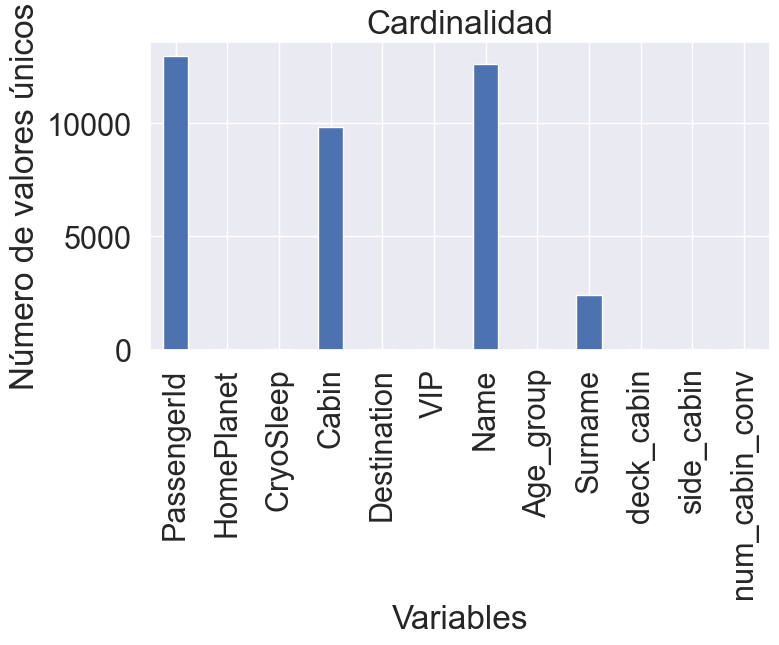

In [89]:
data.select_dtypes(include = 'object').nunique().plot.bar(figsize=(8,4))
plt.ylabel('Número de valores únicos')
plt.xlabel('Variables')
plt.title('Cardinalidad')
plt.show()

In [90]:
del(data['Name'])
del(data['Age'])
del(data['VIP'])
del(data['Cabin'])
del(data['Group'])
del(data['Surname'])
del(data['num_cabin'])

* Voy a volver a separar el train y el test

In [91]:
df_train = data[data['PassengerId'].isin(df_train['PassengerId'].values)].copy()
df_test = data[data['PassengerId'].isin(df_test['PassengerId'].values)].copy()

In [92]:
del(df_train['PassengerId'])
del(df_test['PassengerId'])

In [93]:
print(df_train.shape)
print(df_test.shape)

(8693, 17)
(4277, 17)


* Tratamiento de las variables categoricas

In [94]:
from sklearn.preprocessing import OneHotEncoder

In [95]:
df_train.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Group_size', 'Solo', 'Age_group',
       'Family_size', 'Expenditure', 'No_spending', 'deck_cabin', 'side_cabin',
       'num_cabin_conv'],
      dtype='object')

In [96]:
df_train = pd.get_dummies(df_train, columns=['CryoSleep','HomePlanet','Destination','deck_cabin','side_cabin','Age_group','num_cabin_conv'])

df_test = pd.get_dummies(df_test, columns=['CryoSleep','HomePlanet','Destination','deck_cabin','side_cabin','Age_group','num_cabin_conv'])

In [97]:
df_train.head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group_size,Solo,Family_size,Expenditure,No_spending,...,Age_group_Age_26-30,Age_group_Age_31-50,Age_group_Age_51+,num_cabin_conv_Cabina_0-300,num_cabin_conv_Cabina_1200-1500,num_cabin_conv_Cabina_1500-1800,num_cabin_conv_Cabina_1800+,num_cabin_conv_Cabina_300-600,num_cabin_conv_Cabina_600-900,num_cabin_conv_Cabina_900-1200
0,0.0,0.0,0.0,0.0,0.0,1,1,3.0,0.0,1,...,0,1,0,1,0,0,0,0,0,0
1,109.0,9.0,25.0,549.0,44.0,1,1,4.0,736.0,0,...,0,0,0,1,0,0,0,0,0,0
2,43.0,3576.0,0.0,6715.0,49.0,2,0,7.0,10383.0,0,...,0,0,1,1,0,0,0,0,0,0
3,0.0,1283.0,371.0,3329.0,193.0,2,0,7.0,5176.0,0,...,0,1,0,1,0,0,0,0,0,0
4,303.0,70.0,151.0,565.0,2.0,1,1,9.0,1091.0,0,...,0,0,0,1,0,0,0,0,0,0


In [98]:
df_test.head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group_size,Solo,Family_size,Expenditure,No_spending,...,Age_group_Age_26-30,Age_group_Age_31-50,Age_group_Age_51+,num_cabin_conv_Cabina_0-300,num_cabin_conv_Cabina_1200-1500,num_cabin_conv_Cabina_1500-1800,num_cabin_conv_Cabina_1800+,num_cabin_conv_Cabina_300-600,num_cabin_conv_Cabina_600-900,num_cabin_conv_Cabina_900-1200
8693,0.0,0.0,0.0,0.0,0.0,1,1,8.0,0.0,1,...,1,0,0,1,0,0,0,0,0,0
8694,0.0,9.0,0.0,2823.0,0.0,1,1,4.0,2832.0,0,...,0,0,0,1,0,0,0,0,0,0
8695,0.0,0.0,0.0,0.0,0.0,1,1,6.0,0.0,1,...,0,1,0,1,0,0,0,0,0,0
8696,0.0,6652.0,0.0,181.0,585.0,1,1,2.0,7418.0,0,...,0,1,0,1,0,0,0,0,0,0
8697,10.0,0.0,635.0,0.0,0.0,1,1,5.0,645.0,0,...,0,0,0,1,0,0,0,0,0,0


* Pasar variables a int

In [99]:
df_train.dtypes

RoomService                        float64
FoodCourt                          float64
ShoppingMall                       float64
Spa                                float64
VRDeck                             float64
Group_size                           int64
Solo                                 int32
Family_size                        float64
Expenditure                        float64
No_spending                          int32
CryoSleep_False                      uint8
CryoSleep_True                       uint8
HomePlanet_Earth                     uint8
HomePlanet_Europa                    uint8
HomePlanet_Mars                      uint8
Destination_55 Cancri e              uint8
Destination_PSO J318.5-22            uint8
Destination_TRAPPIST-1e              uint8
deck_cabin_A                         uint8
deck_cabin_B                         uint8
deck_cabin_C                         uint8
deck_cabin_D                         uint8
deck_cabin_E                         uint8
deck_cabin_

In [100]:
df_train.columns

Index(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Group_size', 'Solo', 'Family_size', 'Expenditure', 'No_spending',
       'CryoSleep_False', 'CryoSleep_True', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'deck_cabin_A',
       'deck_cabin_B', 'deck_cabin_C', 'deck_cabin_D', 'deck_cabin_E',
       'deck_cabin_F', 'deck_cabin_G', 'side_cabin_P', 'side_cabin_S',
       'Age_group_Age_0-12', 'Age_group_Age_13-17', 'Age_group_Age_18-25',
       'Age_group_Age_26-30', 'Age_group_Age_31-50', 'Age_group_Age_51+',
       'num_cabin_conv_Cabina_0-300', 'num_cabin_conv_Cabina_1200-1500',
       'num_cabin_conv_Cabina_1500-1800', 'num_cabin_conv_Cabina_1800+',
       'num_cabin_conv_Cabina_300-600', 'num_cabin_conv_Cabina_600-900',
       'num_cabin_conv_Cabina_900-1200'],
      dtype='object')

In [101]:
df_test.columns

Index(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Group_size', 'Solo', 'Family_size', 'Expenditure', 'No_spending',
       'CryoSleep_False', 'CryoSleep_True', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'deck_cabin_A',
       'deck_cabin_B', 'deck_cabin_C', 'deck_cabin_D', 'deck_cabin_E',
       'deck_cabin_F', 'deck_cabin_G', 'side_cabin_P', 'side_cabin_S',
       'Age_group_Age_0-12', 'Age_group_Age_13-17', 'Age_group_Age_18-25',
       'Age_group_Age_26-30', 'Age_group_Age_31-50', 'Age_group_Age_51+',
       'num_cabin_conv_Cabina_0-300', 'num_cabin_conv_Cabina_1200-1500',
       'num_cabin_conv_Cabina_1500-1800', 'num_cabin_conv_Cabina_1800+',
       'num_cabin_conv_Cabina_300-600', 'num_cabin_conv_Cabina_600-900',
       'num_cabin_conv_Cabina_900-1200'],
      dtype='object')

In [102]:
var_int = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Family_size', 'Expenditure',
       'No_spending', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'deck_cabin_A',
       'deck_cabin_B', 'deck_cabin_C', 'deck_cabin_D', 'deck_cabin_E',
       'deck_cabin_F', 'deck_cabin_G', 'side_cabin_P',
       'side_cabin_S', 'Age_group_Age_0-12', 'Age_group_Age_13-17',
       'Age_group_Age_18-25', 'Age_group_Age_26-30', 'Age_group_Age_31-50',
       'Age_group_Age_51+', 'num_cabin_conv_Cabina_0-300',
       'num_cabin_conv_Cabina_1200-1500', 'num_cabin_conv_Cabina_1500-1800',
       'num_cabin_conv_Cabina_1800+', 'num_cabin_conv_Cabina_300-600',
       'num_cabin_conv_Cabina_600-900', 'num_cabin_conv_Cabina_900-1200']

In [103]:
df_train[var_int] = df_train[var_int].astype(int)
df_test[var_int] = df_test[var_int].astype(int)

In [104]:
df_train.head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group_size,Solo,Family_size,Expenditure,No_spending,...,Age_group_Age_26-30,Age_group_Age_31-50,Age_group_Age_51+,num_cabin_conv_Cabina_0-300,num_cabin_conv_Cabina_1200-1500,num_cabin_conv_Cabina_1500-1800,num_cabin_conv_Cabina_1800+,num_cabin_conv_Cabina_300-600,num_cabin_conv_Cabina_600-900,num_cabin_conv_Cabina_900-1200
0,0,0,0,0,0,1,1,3,0,1,...,0,1,0,1,0,0,0,0,0,0
1,109,9,25,549,44,1,1,4,736,0,...,0,0,0,1,0,0,0,0,0,0
2,43,3576,0,6715,49,2,0,7,10383,0,...,0,0,1,1,0,0,0,0,0,0
3,0,1283,371,3329,193,2,0,7,5176,0,...,0,1,0,1,0,0,0,0,0,0
4,303,70,151,565,2,1,1,9,1091,0,...,0,0,0,1,0,0,0,0,0,0


In [105]:
df_test.head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group_size,Solo,Family_size,Expenditure,No_spending,...,Age_group_Age_26-30,Age_group_Age_31-50,Age_group_Age_51+,num_cabin_conv_Cabina_0-300,num_cabin_conv_Cabina_1200-1500,num_cabin_conv_Cabina_1500-1800,num_cabin_conv_Cabina_1800+,num_cabin_conv_Cabina_300-600,num_cabin_conv_Cabina_600-900,num_cabin_conv_Cabina_900-1200
8693,0,0,0,0,0,1,1,8,0,1,...,1,0,0,1,0,0,0,0,0,0
8694,0,9,0,2823,0,1,1,4,2832,0,...,0,0,0,1,0,0,0,0,0,0
8695,0,0,0,0,0,1,1,6,0,1,...,0,1,0,1,0,0,0,0,0,0
8696,0,6652,0,181,585,1,1,2,7418,0,...,0,1,0,1,0,0,0,0,0,0
8697,10,0,635,0,0,1,1,5,645,0,...,0,0,0,1,0,0,0,0,0,0


* Correlaciones

In [106]:
(df_train
.assign(Transported = varObj == 1)
.corr(method='spearman')
.style
.background_gradient(cmap='RdBu', vmax=1, vmin=-1)
.set_sticky(axis='index')
)

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group_size,Solo,Family_size,Expenditure,No_spending,CryoSleep_False,CryoSleep_True,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,deck_cabin_A,deck_cabin_B,deck_cabin_C,deck_cabin_D,deck_cabin_E,deck_cabin_F,deck_cabin_G,side_cabin_P,side_cabin_S,Age_group_Age_0-12,Age_group_Age_13-17,Age_group_Age_18-25,Age_group_Age_26-30,Age_group_Age_31-50,Age_group_Age_51+,num_cabin_conv_Cabina_0-300,num_cabin_conv_Cabina_1200-1500,num_cabin_conv_Cabina_1500-1800,num_cabin_conv_Cabina_1800+,num_cabin_conv_Cabina_300-600,num_cabin_conv_Cabina_600-900,num_cabin_conv_Cabina_900-1200,Transported
RoomService,1.000000,0.196617,0.450482,0.261907,0.191757,-0.142186,0.120213,0.005534,0.540100,-0.604332,0.534507,-0.534507,-0.027947,-0.207458,0.255805,-0.075913,-0.052053,0.100015,-0.042528,-0.152757,-0.096047,0.162331,0.097366,0.241038,-0.217651,0.024121,-0.024121,-0.227513,-0.028081,0.078604,0.011475,0.069976,0.008260,-0.050935,-0.009882,0.098931,0.017588,0.030939,-0.008458,-0.013814,-0.373687
FoodCourt,0.196617,1.000000,0.201127,0.491472,0.514992,-0.057765,0.044046,-0.083582,0.676487,-0.620605,0.548901,-0.548901,-0.054699,0.268676,-0.219667,0.055942,-0.063020,-0.009815,0.130140,0.065424,0.183730,0.031793,0.024565,-0.003574,-0.231145,-0.006365,0.006365,-0.233639,-0.061037,-0.007522,0.057019,0.113945,0.054448,0.151503,-0.052861,-0.004654,0.005693,-0.034287,-0.069220,-0.074272,-0.192377
ShoppingMall,0.450482,0.201127,1.000000,0.268945,0.212392,-0.142131,0.124584,0.006095,0.518401,-0.598403,0.529263,-0.529263,0.021635,-0.193880,0.180419,-0.079843,-0.030961,0.090203,-0.044338,-0.131349,-0.095375,0.106223,0.097147,0.235583,-0.197503,0.019289,-0.019289,-0.225281,-0.010191,0.091341,0.002945,0.053713,0.005463,-0.063362,0.009478,0.078923,0.029406,0.021708,0.004635,-0.004795,-0.234917
Spa,0.261907,0.491472,0.268945,1.000000,0.450204,-0.076322,0.060831,-0.076932,0.670178,-0.639789,0.565868,-0.565868,-0.056429,0.169463,-0.111622,0.016288,-0.069919,0.029642,0.099528,0.015933,0.119029,0.066968,0.046336,0.045491,-0.230110,0.000669,-0.000669,-0.240861,-0.071710,0.022709,0.042401,0.117524,0.036978,0.102264,-0.054040,0.012648,0.017467,-0.013137,-0.058267,-0.047758,-0.374863
VRDeck,0.191757,0.514992,0.212392,0.450204,1.000000,-0.074237,0.059423,-0.068164,0.642126,-0.614400,0.543412,-0.543412,-0.003138,0.199762,-0.209415,0.038660,-0.051101,-0.002025,0.101754,0.032628,0.146599,0.028668,0.026308,0.035672,-0.216513,0.009761,-0.009761,-0.231303,-0.056723,0.015866,0.065526,0.090563,0.038728,0.115081,-0.049392,0.008678,0.005946,-0.021855,-0.059459,-0.054601,-0.354663
Group_size,-0.142186,-0.057765,-0.142131,-0.076322,-0.074237,1.000000,-0.949814,0.161212,-0.096036,0.208736,-0.103096,0.103096,-0.212948,0.216549,0.030326,0.079855,-0.088524,-0.014914,0.078281,0.154651,0.119181,0.012199,-0.064237,-0.140272,-0.021744,-0.011839,0.011839,0.365431,0.004255,-0.144123,-0.037622,-0.058359,-0.009612,0.135888,-0.035838,-0.057613,0.009588,-0.062263,-0.031938,-0.034266,0.114836
Solo,0.120213,0.044046,0.124584,0.060831,0.059423,-0.949814,1.000000,-0.102666,0.069706,-0.186674,0.099183,-0.099183,0.251442,-0.239955,-0.052611,-0.086754,0.096275,0.016138,-0.082798,-0.177958,-0.117650,-0.032693,0.055181,0.134774,0.058918,0.014944,-0.014944,-0.300341,-0.006993,0.133544,0.026906,0.039652,0.006336,-0.158291,0.044630,0.057428,-0.000280,0.056334,0.046483,0.050642,-0.113792
Family_size,0.005534,-0.083582,0.006095,-0.076932,-0.068164,0.161212,-0.102666,1.000000,-0.107494,0.008928,0.027738,-0.027738,0.376206,-0.333921,-0.105513,-0.085109,0.095243,0.015332,-0.096805,-0.173310,-0.181537,-0.091251,-0.033568,0.074161,0.249422,0.013830,-0.013830,0.156852,0.047085,0.027005,-0.069192,-0.082594,-0.028584,-0.216196,0.089261,0.034001,0.038623,0.022749,0.098196,0.090927,-0.061156
Expenditure,0.540100,0.676487,0.518401,0.670178,0.642126,-0.096036,0.069706,-0.107494,1.000000,-0.887843,0.785261

* Scaling

In [107]:
from sklearn.preprocessing import StandardScaler

In [108]:
df_train.columns

Index(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Group_size', 'Solo', 'Family_size', 'Expenditure', 'No_spending',
       'CryoSleep_False', 'CryoSleep_True', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'deck_cabin_A',
       'deck_cabin_B', 'deck_cabin_C', 'deck_cabin_D', 'deck_cabin_E',
       'deck_cabin_F', 'deck_cabin_G', 'side_cabin_P', 'side_cabin_S',
       'Age_group_Age_0-12', 'Age_group_Age_13-17', 'Age_group_Age_18-25',
       'Age_group_Age_26-30', 'Age_group_Age_31-50', 'Age_group_Age_51+',
       'num_cabin_conv_Cabina_0-300', 'num_cabin_conv_Cabina_1200-1500',
       'num_cabin_conv_Cabina_1500-1800', 'num_cabin_conv_Cabina_1800+',
       'num_cabin_conv_Cabina_300-600', 'num_cabin_conv_Cabina_600-900',
       'num_cabin_conv_Cabina_900-1200'],
      dtype='object')

In [109]:
colum = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Group_size', 'Solo', 'Family_size', 'Expenditure', 'No_spending',
       'CryoSleep_False', 'CryoSleep_True', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'deck_cabin_A',
       'deck_cabin_B', 'deck_cabin_C', 'deck_cabin_D', 'deck_cabin_E',
       'deck_cabin_F', 'deck_cabin_G', 'side_cabin_P', 'side_cabin_S',
       'Age_group_Age_0-12', 'Age_group_Age_13-17', 'Age_group_Age_18-25',
       'Age_group_Age_26-30', 'Age_group_Age_31-50', 'Age_group_Age_51+',
       'num_cabin_conv_Cabina_0-300', 'num_cabin_conv_Cabina_1200-1500',
       'num_cabin_conv_Cabina_1500-1800', 'num_cabin_conv_Cabina_1800+',
       'num_cabin_conv_Cabina_300-600', 'num_cabin_conv_Cabina_600-900',
       'num_cabin_conv_Cabina_900-1200']

In [110]:
df_train_esc = pd.DataFrame()
df_test_esc = pd.DataFrame()

In [111]:
scaler = StandardScaler()
df_train_esc[colum] = scaler.fit_transform(df_train[colum])
df_test_esc[colum] = scaler.fit_transform(df_test[colum])

# Modelo

In [113]:
X, x, Y, y = train_test_split(df_train_esc, varObj, test_size=0.2, random_state=42)

* Modelo Baseline

In [115]:
from sklearn import dummy

In [116]:
dummy_model = dummy.DummyClassifier()

In [117]:
dummy_model.fit(X, Y)
dummy_model.score(x, y)

0.5048878665899943

* Mejores modelos

In [118]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [120]:
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=False,
                     random_state=12,
                     classifiers='all')

models, predictions = clf.fit(X , x , Y , y)
models[:15]

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:22<00:00,  1.28it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.81,0.81,0.81,0.81,0.28
XGBClassifier,0.81,0.81,0.81,0.81,0.73
SVC,0.80,0.80,0.80,0.80,2.31
RandomForestClassifier,0.80,0.80,0.80,0.80,0.77
NuSVC,0.79,0.79,0.79,0.79,3.03
AdaBoostClassifier,0.79,0.79,0.79,0.79,0.45
BaggingClassifier,0.78,0.78,0.78,0.78,0.35
RidgeClassifierCV,0.78,0.78,0.78,0.78,0.04
RidgeClassifier,0.78,0.78,0.78,0.78,0.05


Voy a probar con LGB, SCV, XGB y RFC.

* SVC

In [121]:
from sklearn.svm import SVC

In [123]:
svc2 = SVC()

svc2.fit(X, Y)

# Predecir los valores de la muestra de prueba y calcular la precisión
accuracy = svc2.score(x, y)
print(f'Precisión del modelo SVC: {accuracy}')

y_pred_svc2=svc2.predict(x)

svc_acc_score2 = accuracy_score(y, y_pred_svc2)

print(metrics.classification_report(y,
                                    y_pred=svc2.predict(x), target_names=['No_Transported', 'Transported']))

Precisión del modelo SVC: 0.8033352501437608
                precision    recall  f1-score   support

No_Transported       0.80      0.80      0.80       861
   Transported       0.81      0.80      0.80       878

      accuracy                           0.80      1739
     macro avg       0.80      0.80      0.80      1739
  weighted avg       0.80      0.80      0.80      1739



* RFC

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
rfc2 = RandomForestClassifier()

rfc2.fit(X, Y)

# Predecir los valores de la muestra de prueba y calcular la precisión
accuracy = rfc2.score(x, y)
print(f'Precisión del modelo RFC: {accuracy}')

y_pred_rfc2=rfc2.predict(x)

rfc_acc_score2 = accuracy_score(y, y_pred_rfc2)

print(metrics.classification_report(y,
                                    y_pred=rfc2.predict(x), target_names=['No_Transported', 'Transported']))

Precisión del modelo RFC: 0.7981598619896493
                precision    recall  f1-score   support

No_Transported       0.78      0.82      0.80       861
   Transported       0.82      0.77      0.79       878

      accuracy                           0.80      1739
     macro avg       0.80      0.80      0.80      1739
  weighted avg       0.80      0.80      0.80      1739



* XGBoost

In [128]:
xgb2 = XGBClassifier()

xgb2.fit(X,Y)
xgb2.score(x, y)

y_pred_xgb2=xgb2.predict(x)

xgb_acc_score2 = accuracy_score(y, y_pred_xgb2)

print(metrics.classification_report(y,
                                    y_pred=xgb2.predict(x), target_names=['No_Transported', 'Transported']))

                precision    recall  f1-score   support

No_Transported       0.81      0.79      0.80       861
   Transported       0.80      0.82      0.81       878

      accuracy                           0.81      1739
     macro avg       0.81      0.81      0.81      1739
  weighted avg       0.81      0.81      0.81      1739



* Lightgbm

In [129]:
import lightgbm as lgb

In [131]:
clf2 = lgb.LGBMClassifier() 

clf2.fit(X, Y)

y_pred_clf2=clf2.predict(x)

clf_acc_score2 = accuracy_score(y, y_pred_clf2)

accuracy=accuracy_score(y_pred_clf, y)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y, y_pred_clf2)))

print(metrics.classification_report(y,
                                    y_pred=clf2.predict(x), target_names=['No_Transported', 'Transported']))

LightGBM Model accuracy score: 0.8005
                precision    recall  f1-score   support

No_Transported       0.81      0.78      0.80       861
   Transported       0.79      0.82      0.81       878

      accuracy                           0.80      1739
     macro avg       0.80      0.80      0.80      1739
  weighted avg       0.80      0.80      0.80      1739



In [136]:
model_ev2 = pd.DataFrame({'Model': ['Support Vector Machine','XGBoost','Random Forest','LightGBM'], 
                         'Accuracy': [svc_acc_score2*100,xgb_acc_score2*100,rfc_acc_score2*100,clf_acc_score2*100,]})
model_ev2

,Model,Accuracy
0,Support Vector Machine,80.33
1,XGBoost,80.62
2,Random Forest,79.82
3,LightGBM,80.05


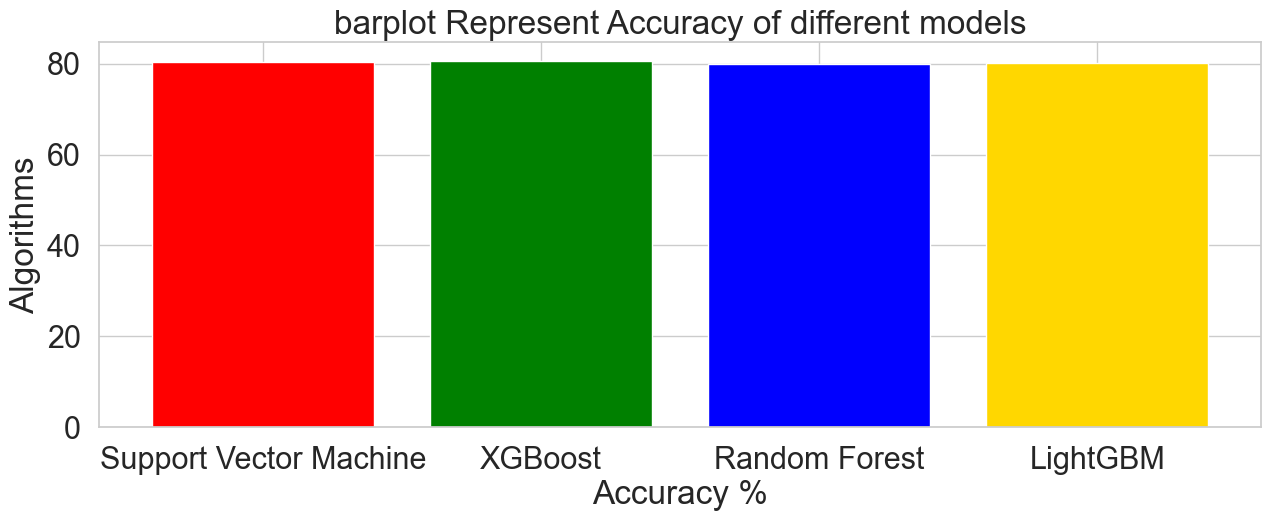

In [137]:
colors = ['red','green','blue','gold']
plt.figure(figsize=(15,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev2['Model'],model_ev2['Accuracy'],color = colors)
plt.show()

* Curva Roc

In [132]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

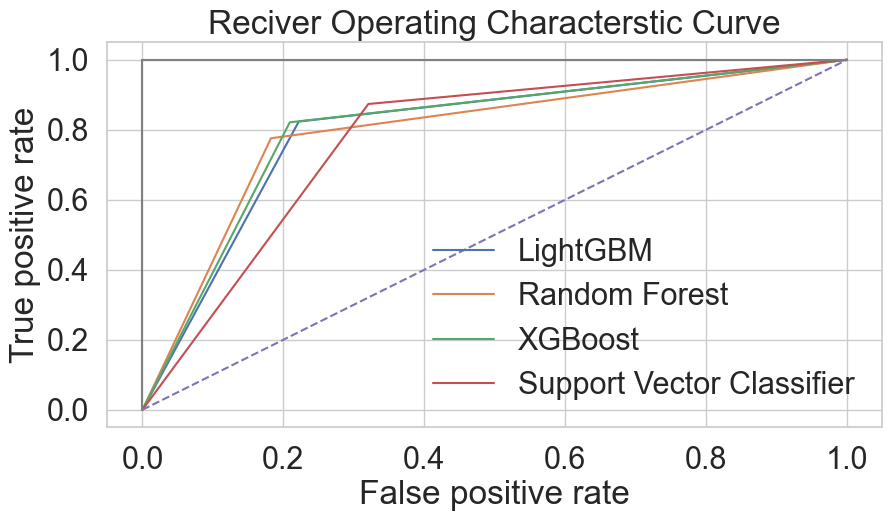

In [133]:
clf_false_positive_rate,clf_true_positive_rate,clf_threshold = roc_curve(y_test,y_pred_clf)
rfc_false_positive_rate,rfc_true_positive_rate,rfc_threshold = roc_curve(y_test,y_pred_rfc)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,y_pred_xgb)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,y_pred_svc)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(clf_false_positive_rate,clf_true_positive_rate,label='LightGBM')
plt.plot(rfc_false_positive_rate,rfc_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='XGBoost')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

* Validación Cruzada

In [138]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [143]:
cv = cross_val_score(
    xgb2,
    X, 
    Y,
    scoring = "accuracy",
    cv = 5
)
print(cv)
print("Accuracy:", cv.mean(), np.std(cv))

[0.80589504 0.80733285 0.79439252 0.81092739 0.81007194]
Accuracy: 0.8057239499557796 0.0059497882897951255


RF
Accuracy: 0.80237 +/- 0.01397
-------------------------
XGB
Accuracy: 0.80635 +/- 0.01153
-------------------------
LGB
Accuracy: 0.81076 +/- 0.01350
-------------------------
SVC
Accuracy: 0.80318 +/- 0.01377
-------------------------


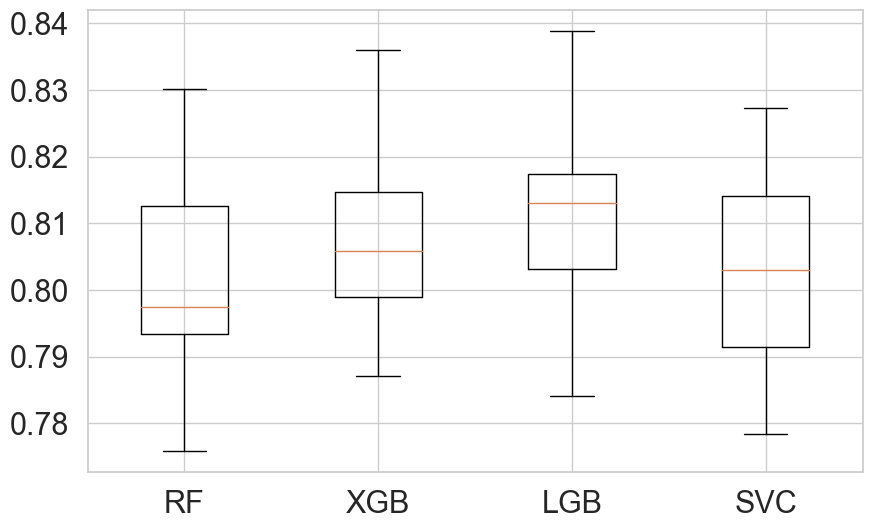

In [145]:
models_rcv2 = {
     "RF": RandomForestClassifier(),
     "XGB": XGBClassifier(),
     "LGB": lgb.LGBMClassifier(),
     "SVC": SVC()
}

def rskf_comparison(models, X, Y):
    
    results = []
    names = []

    for k, v in models.items():
    
        rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1234) 
        cv_scores = cross_val_score(v, X, Y, scoring='accuracy', cv=rskf, n_jobs=-1)

        results.append(cv_scores)
        names.append(k)

        print(k)
        print('Accuracy: %.5f +/- %.5f' % (np.mean(cv_scores), np.std(cv_scores)))
        print('-------------------------')
        
    
    return(results, names)


results, names = rskf_comparison(models_rcv2, X, Y)
plt.figure(figsize=(10, 6))
comparison = plt.boxplot(results)
plt.xticks(np.arange(1,len(names)+1),names)
plt.show(comparison)

* Hiperparámetros

XGBoost

https://towardsdatascience.com/an-example-of-hyperparameter-optimization-on-xgboost-lightgbm-and-catboost-using-hyperopt-12bc41a271e

In [146]:
from hyperopt import fmin, tpe, STATUS_OK, STATUS_FAIL, Trials
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [ ]:
params2 = {
    'learning_rate':    hp.loguniform('learning_rate', np.log(0.01), np.log(1)),
    'max_depth':        hp.choice('max_depth', [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]),
    'min_child_weight': hp.choice('min_child_weight', [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.1, 1.0),
    'subsample':        hp.uniform('subsample', 0.1, 1.0),
    'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
     'reg_lambda' : hp.uniform('reg_lambda', 0,1),
    'n_estimators': hp.choice('n_estimators', [10,25,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400])
}


fit_params = {
    'eval_metric': 'error',
    'early_stopping_rounds': 10,
    'verbose': False
}

xgb_para = dict()
xgb_para['reg_params'] = params2
xgb_para['fit_params'] = fit_params
xgb_para['loss_func' ] = lambda y, pred: 1 - accuracy_score(y, pred)

lgb_para = dict()
lgb_para['reg_params'] = params2
lgb_para['fit_params'] = fit_params
lgb_para['loss_func' ] = lambda y, pred: 1 - accuracy_score(y, pred)

In [ ]:
class HPOpt2(object):

    def __init__(self, X, x, Y, y):
        self.X = X
        self.x  = x
        self.Y = Y
        self.y  = y

    def process(self, fn_name, space, trials, algo, max_evals):
        fn = getattr(self, fn_name)
        try:
            result = fmin(fn=fn, space=space, algo=algo, max_evals=max_evals, trials=trials)
        except Exception as e:
            return {'status': STATUS_FAIL,
                    'exception': str(e)}
        return result, trials

    def xgb_reg(self, para):
        reg = XGBClassifier(**para['reg_params'])
        return self.train_reg(reg, para)
    
    def lgb_reg(self, para):
        reg = lgb.LGBMClassifier(**para['reg_params'])
        return self.train_reg(reg, para)

    def train_reg(self, reg, para):
        reg.fit(self.X, self.Y,
                eval_set=[(self.X, self.Y), (self.x, self.y)],
                **para['fit_params'])
        pred = reg.predict(self.x)
        acc = accuracy_score(self.y, pred)
        return {'loss': 1 - acc, 'status': STATUS_OK}  # Devuelve la exactitud en lugar de la pérdida

In [ ]:
lgb_para2['loss_func'] = lambda y, pred: 1 - accuracy_score(y, pred)
lgb_para2['accuracy_func'] = _accuracy

In [ ]:
obj2 = HPOpt2(X, x, Y, y)

xgb_opt2 = obj2.process(fn_name='xgb_reg2', space=xgb_para, trials=Trials(), algo=tpe.suggest, max_evals=10000)

In [ ]:
lgb_opt2 = obj2.process(fn_name='lgb_reg2', space=lgb_para, trials=Trials(), algo=tpe.suggest, max_evals=10000)

* Modelo final

In [171]:
xgb_opt2

({'colsample_bytree': 0.9995538001598108,
  'gamma': 0.4349032595913322,
  'learning_rate': 0.7058317876491879,
  'max_depth': 22,
  'min_child_weight': 2,
  'n_estimators': 15,
  'reg_alpha': 40.0,
  'reg_lambda': 0.5413689126401549,
  'subsample': 0.7428960815075646},
 <hyperopt.base.Trials at 0x1f13a428790>)

* XGB final

In [201]:
xgb_final2 = XGBClassifier(colsample_bytree = 0.9995538001598108,
                          gamma = 0.4349032595913322,
                          learning_rate =0.7058317876491879,
                          max_depth=22,
                          min_child_weight=2,
                          n_estimators=15,
                          reg_alpha=40 ,
                          reg_lambda=0.5413689126401549,
                          subsample = 0.7428960815075646)

xgb_final2.fit(X, Y, 
              eval_set=[(X, Y),(x, y)], 
              verbose=1)

xgb_final2.score(x, y)

print(metrics.classification_report(y,
                                    y_pred=xgb_final2.predict(x), target_names=['No_Transported', 'Transported']))

[0]	validation_0-logloss:0.52563	validation_1-logloss:0.53390
[1]	validation_0-logloss:0.46899	validation_1-logloss:0.48420
[2]	validation_0-logloss:0.44889	validation_1-logloss:0.46676
[3]	validation_0-logloss:0.43108	validation_1-logloss:0.44694
[4]	validation_0-logloss:0.42272	validation_1-logloss:0.43916
[5]	validation_0-logloss:0.41365	validation_1-logloss:0.43120
[6]	validation_0-logloss:0.41083	validation_1-logloss:0.42978
[7]	validation_0-logloss:0.40663	validation_1-logloss:0.42900
[8]	validation_0-logloss:0.40325	validation_1-logloss:0.42566
[9]	validation_0-logloss:0.40325	validation_1-logloss:0.42566
[10]	validation_0-logloss:0.40325	validation_1-logloss:0.42566
[11]	validation_0-logloss:0.40047	validation_1-logloss:0.42462
[12]	validation_0-logloss:0.40009	validation_1-logloss:0.42447
[13]	validation_0-logloss:0.39759	validation_1-logloss:0.42227
[14]	validation_0-logloss:0.39641	validation_1-logloss:0.42194
                precision    recall  f1-score   support

No_Trans

In [175]:
cv = cross_val_score(
    xgb_final,
    X, 
    Y,
    scoring = "accuracy",
    cv = 5
)
print(cv)
print("Accuracy:", cv.mean(), np.std(cv))

[0.78360891 0.80445723 0.79079799 0.79439252 0.81582734]
Accuracy: 0.7978167976043322 0.01123679799143945


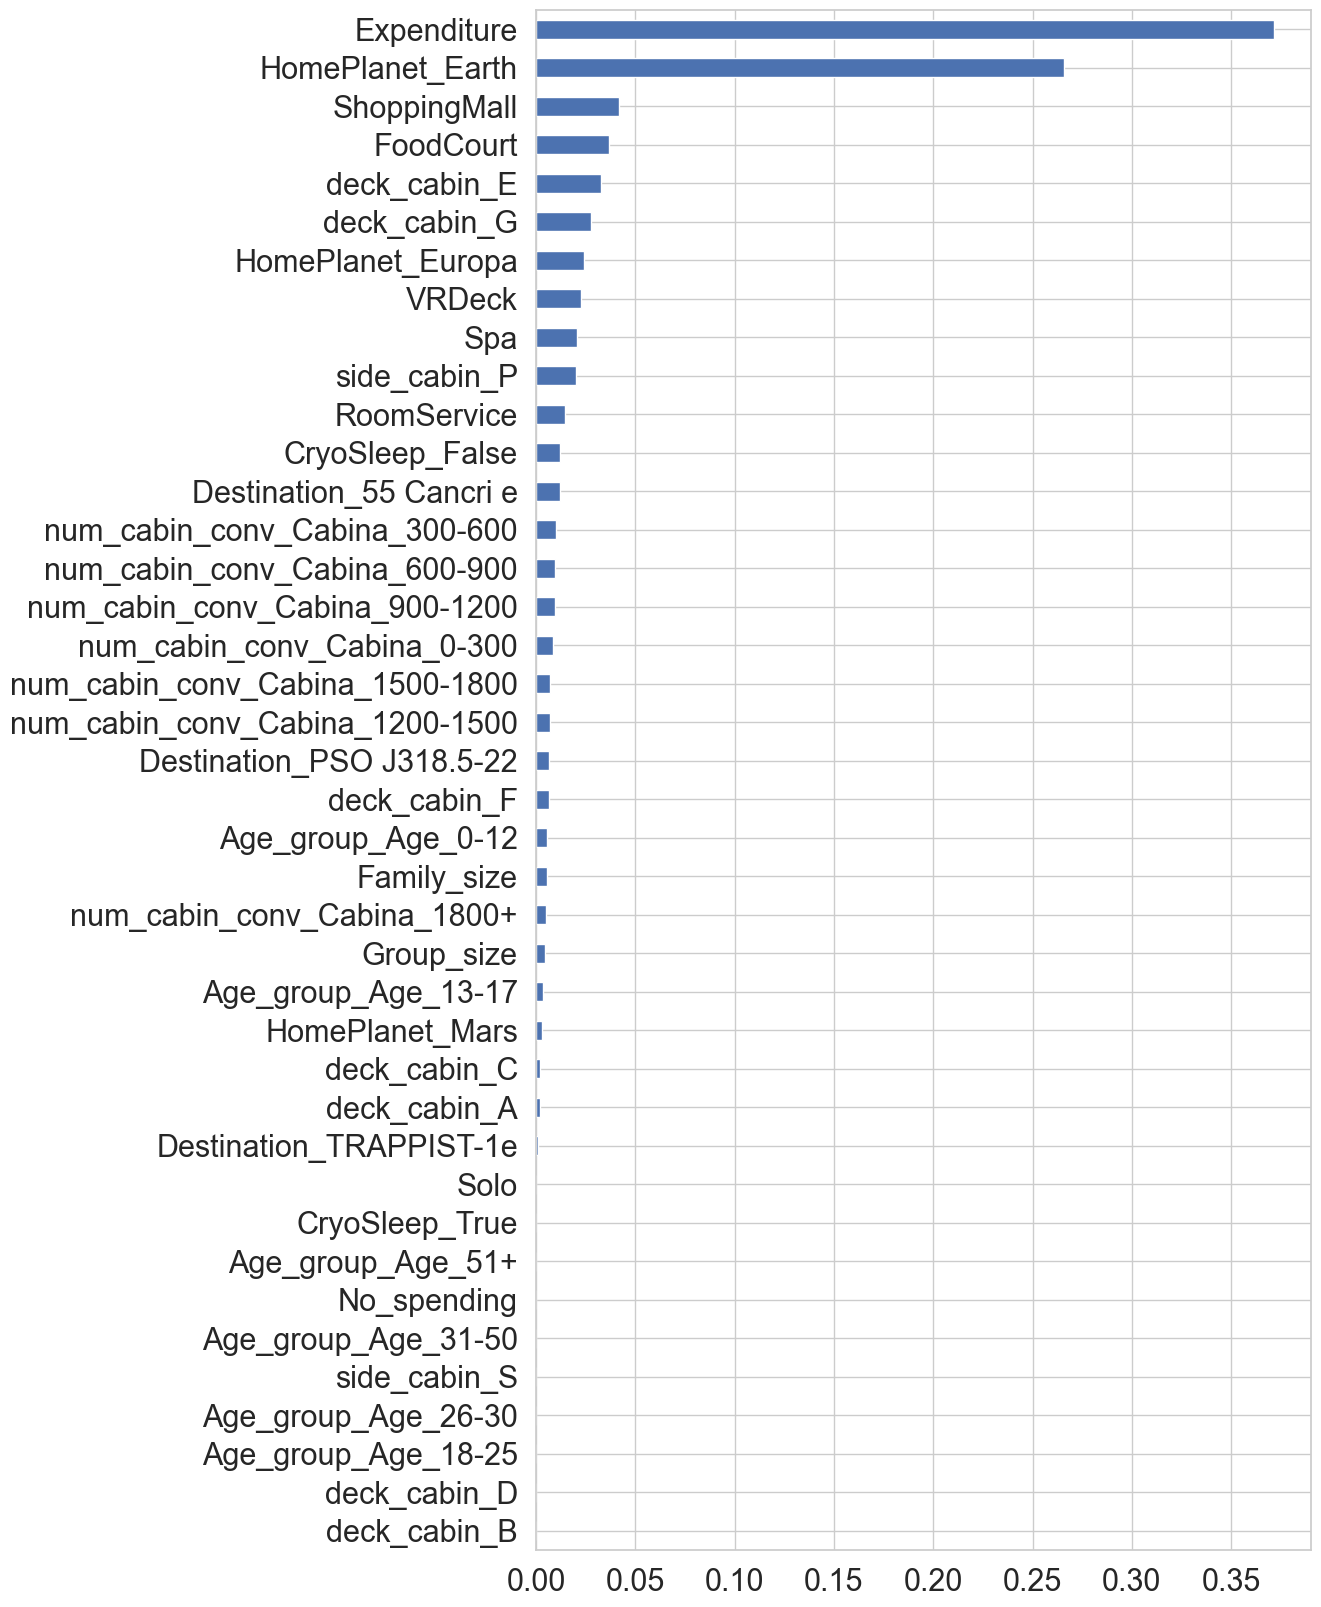

In [176]:
fig, ax = plt.subplots(figsize=(10, 20))
(pd.Series(xgb_final.feature_importances_, index=X_train.columns)
.sort_values()
.plot.barh(ax=ax)
)
plt.show()

* LGB final

In [ ]:
lgb_opt2

In [180]:
clf_final2 = lgb.LGBMClassifier(colsample_bytree = 0.44649342389954044,
                          learning_rate =0.32241659067662415,
                          max_depth=16,
                          min_child_weight=7,
                          n_estimators=16,
                          subsample = 0.6824076043739623)

In [181]:
clf_final2.fit((X, Y, 
              eval_set=[(X, Y),(x, y)], 
              verbose=1)

clf_final2.score(X_test, y_test)

[1]	training's binary_logloss: 0.57949	valid_1's binary_logloss: 0.586218
[2]	training's binary_logloss: 0.517299	valid_1's binary_logloss: 0.525431
[3]	training's binary_logloss: 0.480036	valid_1's binary_logloss: 0.492313
[4]	training's binary_logloss: 0.451794	valid_1's binary_logloss: 0.465999
[5]	training's binary_logloss: 0.433611	valid_1's binary_logloss: 0.450132
[6]	training's binary_logloss: 0.415186	valid_1's binary_logloss: 0.434086
[7]	training's binary_logloss: 0.400292	valid_1's binary_logloss: 0.420176
[8]	training's binary_logloss: 0.386923	valid_1's binary_logloss: 0.41247
[9]	training's binary_logloss: 0.379248	valid_1's binary_logloss: 0.410251
[10]	training's binary_logloss: 0.37167	valid_1's binary_logloss: 0.406938
[11]	training's binary_logloss: 0.36357	valid_1's binary_logloss: 0.40434
[12]	training's binary_logloss: 0.356972	valid_1's binary_logloss: 0.402418
[13]	training's binary_logloss: 0.351917	valid_1's binary_logloss: 0.401063
[14]	training's binary_log

0.8016101207590569

In [182]:
print(metrics.classification_report(y,
                                    y_pred=clf_final2.predict(x), target_names=['No_Transported', 'Transported']))

                precision    recall  f1-score   support

No_Transported       0.82      0.77      0.79       861
   Transported       0.79      0.83      0.81       878

      accuracy                           0.80      1739
     macro avg       0.80      0.80      0.80      1739
  weighted avg       0.80      0.80      0.80      1739



In [183]:
cv = cross_val_score(
    clf_final,
    X, 
    Y,
    scoring = "accuracy",
    cv = 5
)
print(cv)
print("Accuracy:", cv.mean(), np.std(cv))

[0.80805176 0.80661395 0.79870597 0.8023005  0.81151079]
Accuracy: 0.8054365939311815 0.004477891008804354


In [ ]:
fig, ax = plt.subplots(figsize=(10, 20))
(pd.Series(clf_final.feature_importances_, index=X_train.columns)
.sort_values()
.plot.barh(ax=ax)
)
plt.show()

* Stacking

In [178]:
from mlxtend.classifier import StackingCVClassifier

In [202]:
ens2 =StackingCVClassifier(classifiers=[clf_final,xgb2],meta_classifier= xgb2,random_state=42,cv=5)
ens2.fit(X,Y)
ens_predicted2 = ens2.predict(x)
ens_conf_matrix2 = confusion_matrix(y, ens_predicted2)
ens_acc_score2 = accuracy_score(y, ens_predicted2)
print("confussion matrix")
print(ens_conf_matrix2)
print("\n")
print("Accuracy of StackingCVClassifier:",ens_acc_score2*100,'\n')
print(classification_report(y,ens_predicted2))

confussion matrix
[[681 180]
 [157 721]]


Accuracy of StackingCVClassifier: 80.62104657849338 

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       861
           1       0.80      0.82      0.81       878

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



* SUBMISSION PROCESS

In [203]:
real_data = pd.read_csv("test.csv")

In [204]:
real_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.00,False,0.00,0.00,0.00,0.00,0.00,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.00,False,0.00,9.00,0.00,2823.00,0.00,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.00,False,0.00,0.00,0.00,0.00,0.00,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.00,False,0.00,6652.00,0.00,181.00,585.00,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.00,False,10.00,0.00,635.00,0.00,0.00,Brence Harperez


In [205]:
PassengerID = real_data["PassengerId"]
PassengerID.head()

0    0013_01
1    0018_01
2    0019_01
3    0021_01
4    0023_01
Name: PassengerId, dtype: object

In [206]:
y_subm = pd.Series(ens2.predict(df_test)).map({0:False, 1:True})

In [207]:
submission = pd.DataFrame({"PassengerId": PassengerID.values, "Transported": y_subm})
submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False


In [208]:
submission.shape

(4277, 2)

In [209]:
submission.to_csv('submission.csv', index = False)
print("My competition submission: \n\n", submission)

My competition submission: 

      PassengerId  Transported
0        0013_01        False
1        0018_01        False
2        0019_01         True
3        0021_01        False
4        0023_01        False
...          ...          ...
4272     9266_02        False
4273     9269_01        False
4274     9271_01        False
4275     9273_01        False
4276     9277_01        False

[4277 rows x 2 columns]


In [210]:
submission.to_csv('C:/Users/xikix/Downloads/submission.csv', index=False)